In [30]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [31]:
#import pandas 
import pandas as pd
#import numpy
import numpy as np

In [32]:
#set the address where the the dataframe is to be saved
#dataFramePickleAddress="E:/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionDataset.pkl"
dataFramePickleAddress="G:/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionDataset.pkl"

In [33]:
#read the dataframe
dataframe=pd.read_pickle(dataFramePickleAddress)

In [34]:
dataframe

Max Lat per section  Min Lat per section  Max Lon per section   
0                   -87.5                -90.0                180.0  \
1                   -82.5                -87.5               -135.0   
2                   -82.5                -87.5                -90.0   
3                   -82.5                -87.5                -45.0   
4                   -82.5                -87.5                  0.0   
...                   ...                  ...                  ...   
1785                 87.5                 82.5                 45.0   
1786                 87.5                 82.5                 90.0   
1787                 87.5                 82.5                135.0   
1788                 87.5                 82.5                180.0   
1789                 90.0                 87.5                180.0   

      Min Lon per section  No. of spectra per section   
0                  -180.0                        7002  \
1                  -180.0                        1599   
2                  -135.0                        1940   
3                   -90.0                        1818   
4                   -45.0                        1855   
...                   ...                         ...   
1785                  0.0                        1748   
1786                 45.0                        2035   
1787                 90.0                        1903   
1788                135.0                        1902   
1789               -180.0                        7294   

      Total active time per section   
0                     215153.707937  \
1                      49113.391313   
2                      59600.854365   
3                      55864.552890   
4                      57007.157885   
...                             ...   
1785                   53653.126808   
1786                   62483.348769   
1787                   58474.988092   
1788                   58399.244640   
1789                  223993.416783   

                                         Summed Spectra   
0     [270112.3731329723, 44221.71628033137, 45327.9...  \
1     [101728.76450092324, 11353.802617173642, 10565...   
2     [69004.10988058499, 13041.311258502305, 12455....   
3     [51455.21453525051, 11348.088811988011, 11487....   
4     [51138.233213284286, 10203.879826977849, 12005...   
...                                                 ...   
1785  [172204.68795185376, 12837.986652251333, 11392...   
1786  [69631.4865040512, 13027.290796013549, 12597.1...   
1787  [58870.11519813659, 11691.651373354718, 11794....   
1788  [69077.49428235987, 10543.676356979646, 11999....   
1789  [342422.3644296753, 45978.50919445278, 45791.6...   

                                     Normalized Spectra   
0     [75.32634479500912, 12.332127585726989, 12.640...  \
1     [124.27824075904886, 13.87051756806718, 12.906...   
2     [69.4662289143658, 13.12864863838364, 12.53878...   
3     [55.264254565457236, 12.188146033430378, 12.33...   
4     [53.82296024948041, 10.739577490433051, 12.635...   
...                                                 ...   
1785  [192.57556626933405, 14.356650673799725, 12.73...   
1786  [66.8640409410214, 12.509531949810704, 12.0964...   
1787  [60.40543191435932, 11.996566485773727, 12.102...   
1788  [70.97094632772614, 10.832684314943478, 12.328...   
1789  [91.72297186611817, 12.316034066037092, 12.265...   

                                 Log Normalized Spectra  Aluminum  Calcium   
0     [1.8769468938381042, 1.0910380092016139, 1.101...    15.151   11.456  \
1     [2.0943950968999223, 1.1420926667518603, 1.110...    13.394   10.459   
2     [1.8417737231418783, 1.118220025472807, 1.0982...    13.634   12.915   
3     [1.742444316396172, 1.085937649122431, 1.09122...    14.642   12.301   
4     [1.7309675801735431, 1.030987195964759, 1.1015...    14.030   13.188   
...                                                 ...       ...      ...   
1785  [2.2846011835800297, 1.157053

In [35]:
abundanceValues=[[]]*10

In [36]:
#read the data into lists/arrays
maxLatitudePerSection=dataframe['Max Lat per section'].to_numpy()
minLatitudePerSection=dataframe['Min Lat per section'].to_numpy()
maxLongitudePerSection=dataframe['Max Lon per section'].to_numpy()
minLongitudePerSection=dataframe['Min Lon per section'].to_numpy()
noOfSpectraPerSection=dataframe['No. of spectra per section'].to_numpy()
totalActiveTimePerSection=dataframe['Total active time per section'].to_numpy()
summedSpectraPerSection=dataframe['Summed Spectra'].to_numpy()
normalizedSpectraPerSection=dataframe['Normalized Spectra'].to_numpy()
logScaledNormalizedSpectraPerSection=dataframe['Log Normalized Spectra'].to_numpy()
abundanceValues[0]=dataframe['Aluminum'].to_numpy()
abundanceValues[1]=dataframe['Calcium'].to_numpy()
abundanceValues[2]=dataframe['Iron'].to_numpy()
abundanceValues[3]=dataframe['Magnesium'].to_numpy()
abundanceValues[4]=dataframe['Oxygen'].to_numpy()
abundanceValues[5]=dataframe['Potassium'].to_numpy()
abundanceValues[6]=dataframe['Silicon'].to_numpy()
abundanceValues[7]=dataframe['Thorium'].to_numpy()
abundanceValues[8]=dataframe['Titanium'].to_numpy()
abundanceValues[9]=dataframe['Uranium'].to_numpy()
#get the names of the elements
elementNames=dataframe.columns.to_numpy()[-10:]

In [37]:
#remove the suumed and normalized spectra
del summedSpectraPerSection
del normalizedSpectraPerSection

In [38]:
del dataframe
del dataFramePickleAddress
del pd

In [39]:
#reshape the spectra
temp=[]
for i in range(logScaledNormalizedSpectraPerSection.shape[0]):
    temp.append(logScaledNormalizedSpectraPerSection[i])
logScaledNormalizedSpectraPerSection=np.vstack(logScaledNormalizedSpectraPerSection)

In [40]:
del temp

In [41]:
#compute the eneergy values for each band
gain=17.8 #keV/channel
energyBands=np.arange(0,512,1)*gain

In [42]:
#import tensorflow
import tensorflow as tf

In [43]:
#import pyplot from matplotlib
import matplotlib.pyplot as plt

In [44]:
#set plot parameters
noOfRows=2
noOfPlotsPerRow=5
baseFontSize=18

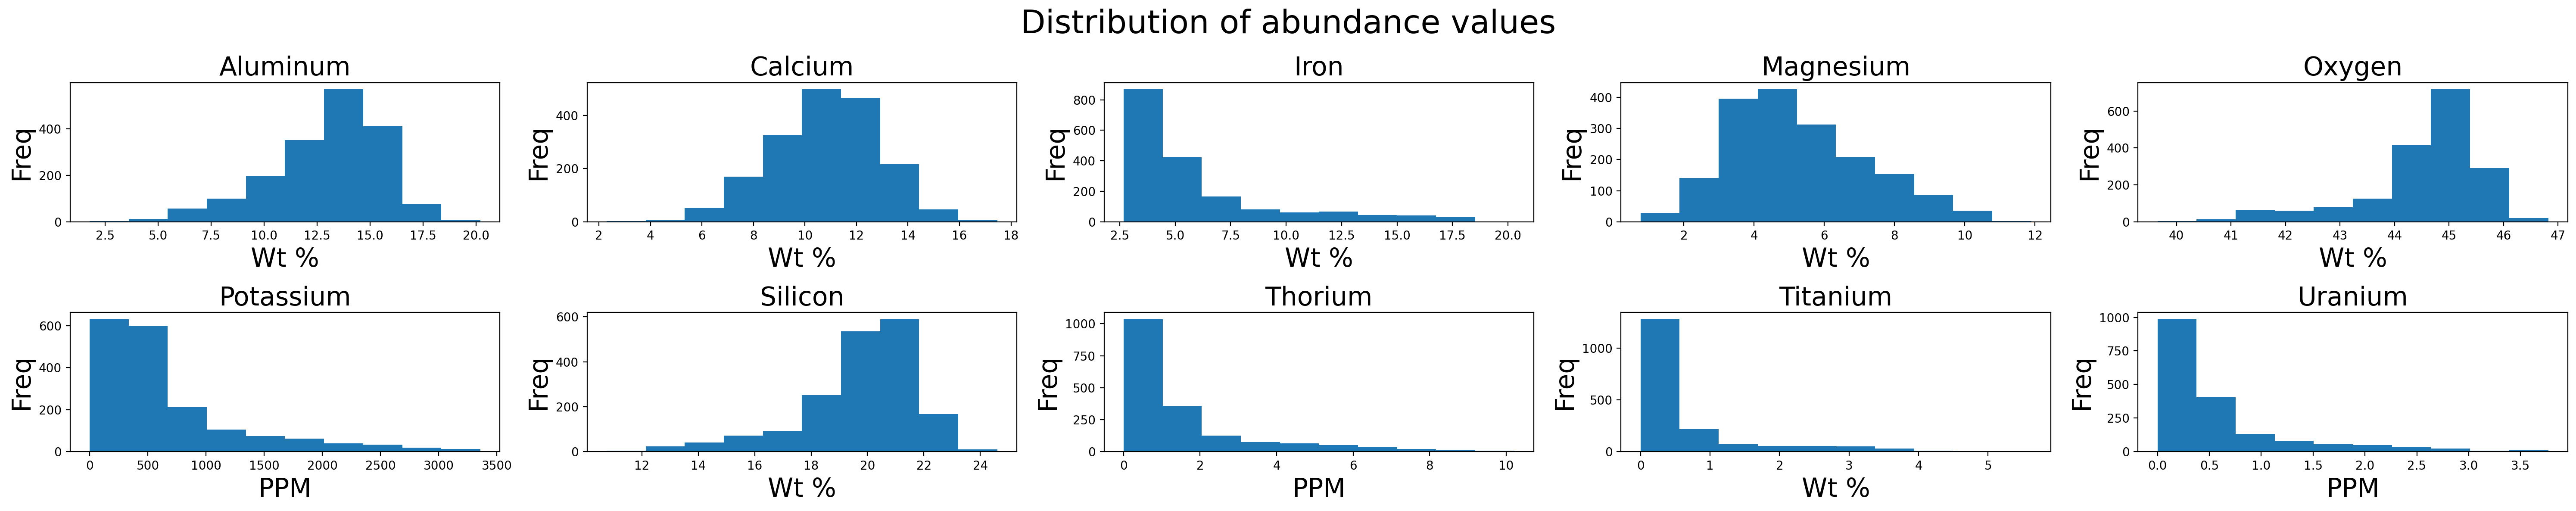

In [45]:
#create a figure
figure,axes=plt.subplots(nrows=noOfRows,
                         ncols=noOfPlotsPerRow,
                         figsize=(30,6),
                         dpi=200)
#iterate through the elemental abundances and plot their historgrams
for i in range(elementNames.shape[0]):
    #generate the histogram
    temp=axes[i//noOfPlotsPerRow,i%noOfPlotsPerRow].hist(abundanceValues[i])
    
    #annotate the figure
    axes[i//noOfPlotsPerRow,i%noOfPlotsPerRow].set_title(elementNames[i],fontsize=baseFontSize*1.2)
    if i in [5,7,9]:
        axes[i//noOfPlotsPerRow,i%noOfPlotsPerRow].set_xlabel("PPM",fontsize=baseFontSize*1.2)
    else:
        axes[i//noOfPlotsPerRow,i%noOfPlotsPerRow].set_xlabel("Wt %",fontsize=baseFontSize*1.2)
    axes[i//noOfPlotsPerRow,i%noOfPlotsPerRow].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    axes[i//noOfPlotsPerRow,i%noOfPlotsPerRow].margins(0.05)

#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

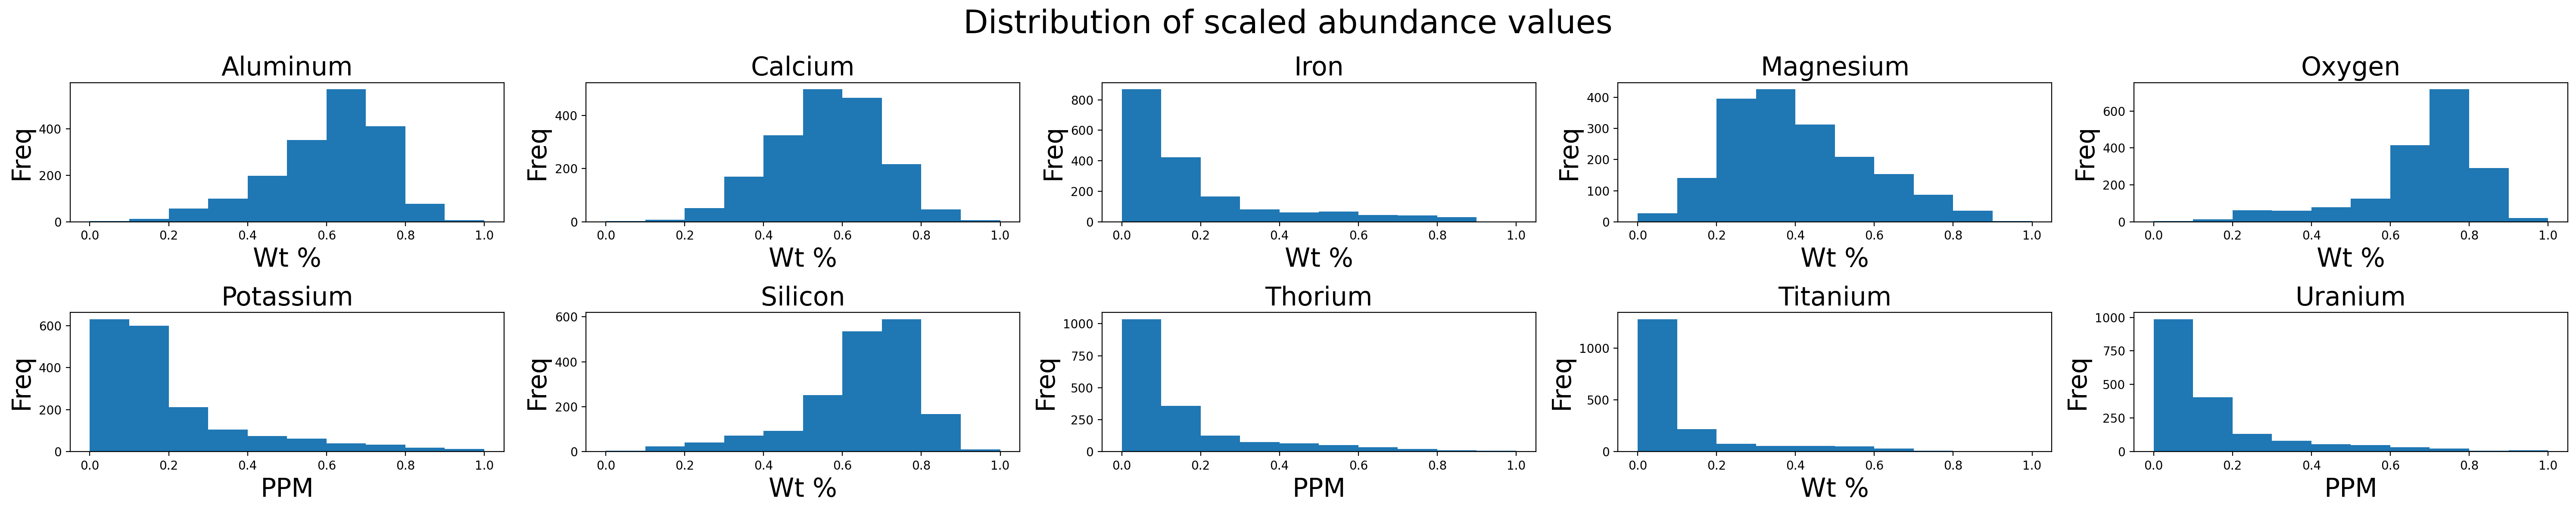

In [46]:
#create a figure
figure,axes=plt.subplots(nrows=noOfRows,
                         ncols=noOfPlotsPerRow,
                         figsize=(30,6),
                         dpi=200)
#iterate through the elemental abundances and plot their historgrams
for i in range(elementNames.shape[0]):
    #scale the abundance values for the current mineral between 0 and 1
    scaledAbundanceValues=(abundanceValues[i]-np.amin(abundanceValues[i]))/np.ptp(abundanceValues[i])
    #generate the histogram
    temp=axes[i//noOfPlotsPerRow,i%noOfPlotsPerRow].hist(scaledAbundanceValues)
    
    #annotate the figure
    axes[i//noOfPlotsPerRow,i%noOfPlotsPerRow].set_title(elementNames[i],fontsize=baseFontSize*1.2)
    if i in [5,7,9]:
        axes[i//noOfPlotsPerRow,i%noOfPlotsPerRow].set_xlabel("PPM",fontsize=baseFontSize*1.2)
    else:
        axes[i//noOfPlotsPerRow,i%noOfPlotsPerRow].set_xlabel("Wt %",fontsize=baseFontSize*1.2)
    axes[i//noOfPlotsPerRow,i%noOfPlotsPerRow].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    axes[i//noOfPlotsPerRow,i%noOfPlotsPerRow].margins(0.05)
    
#add a title
figure.suptitle("Distribution of scaled abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

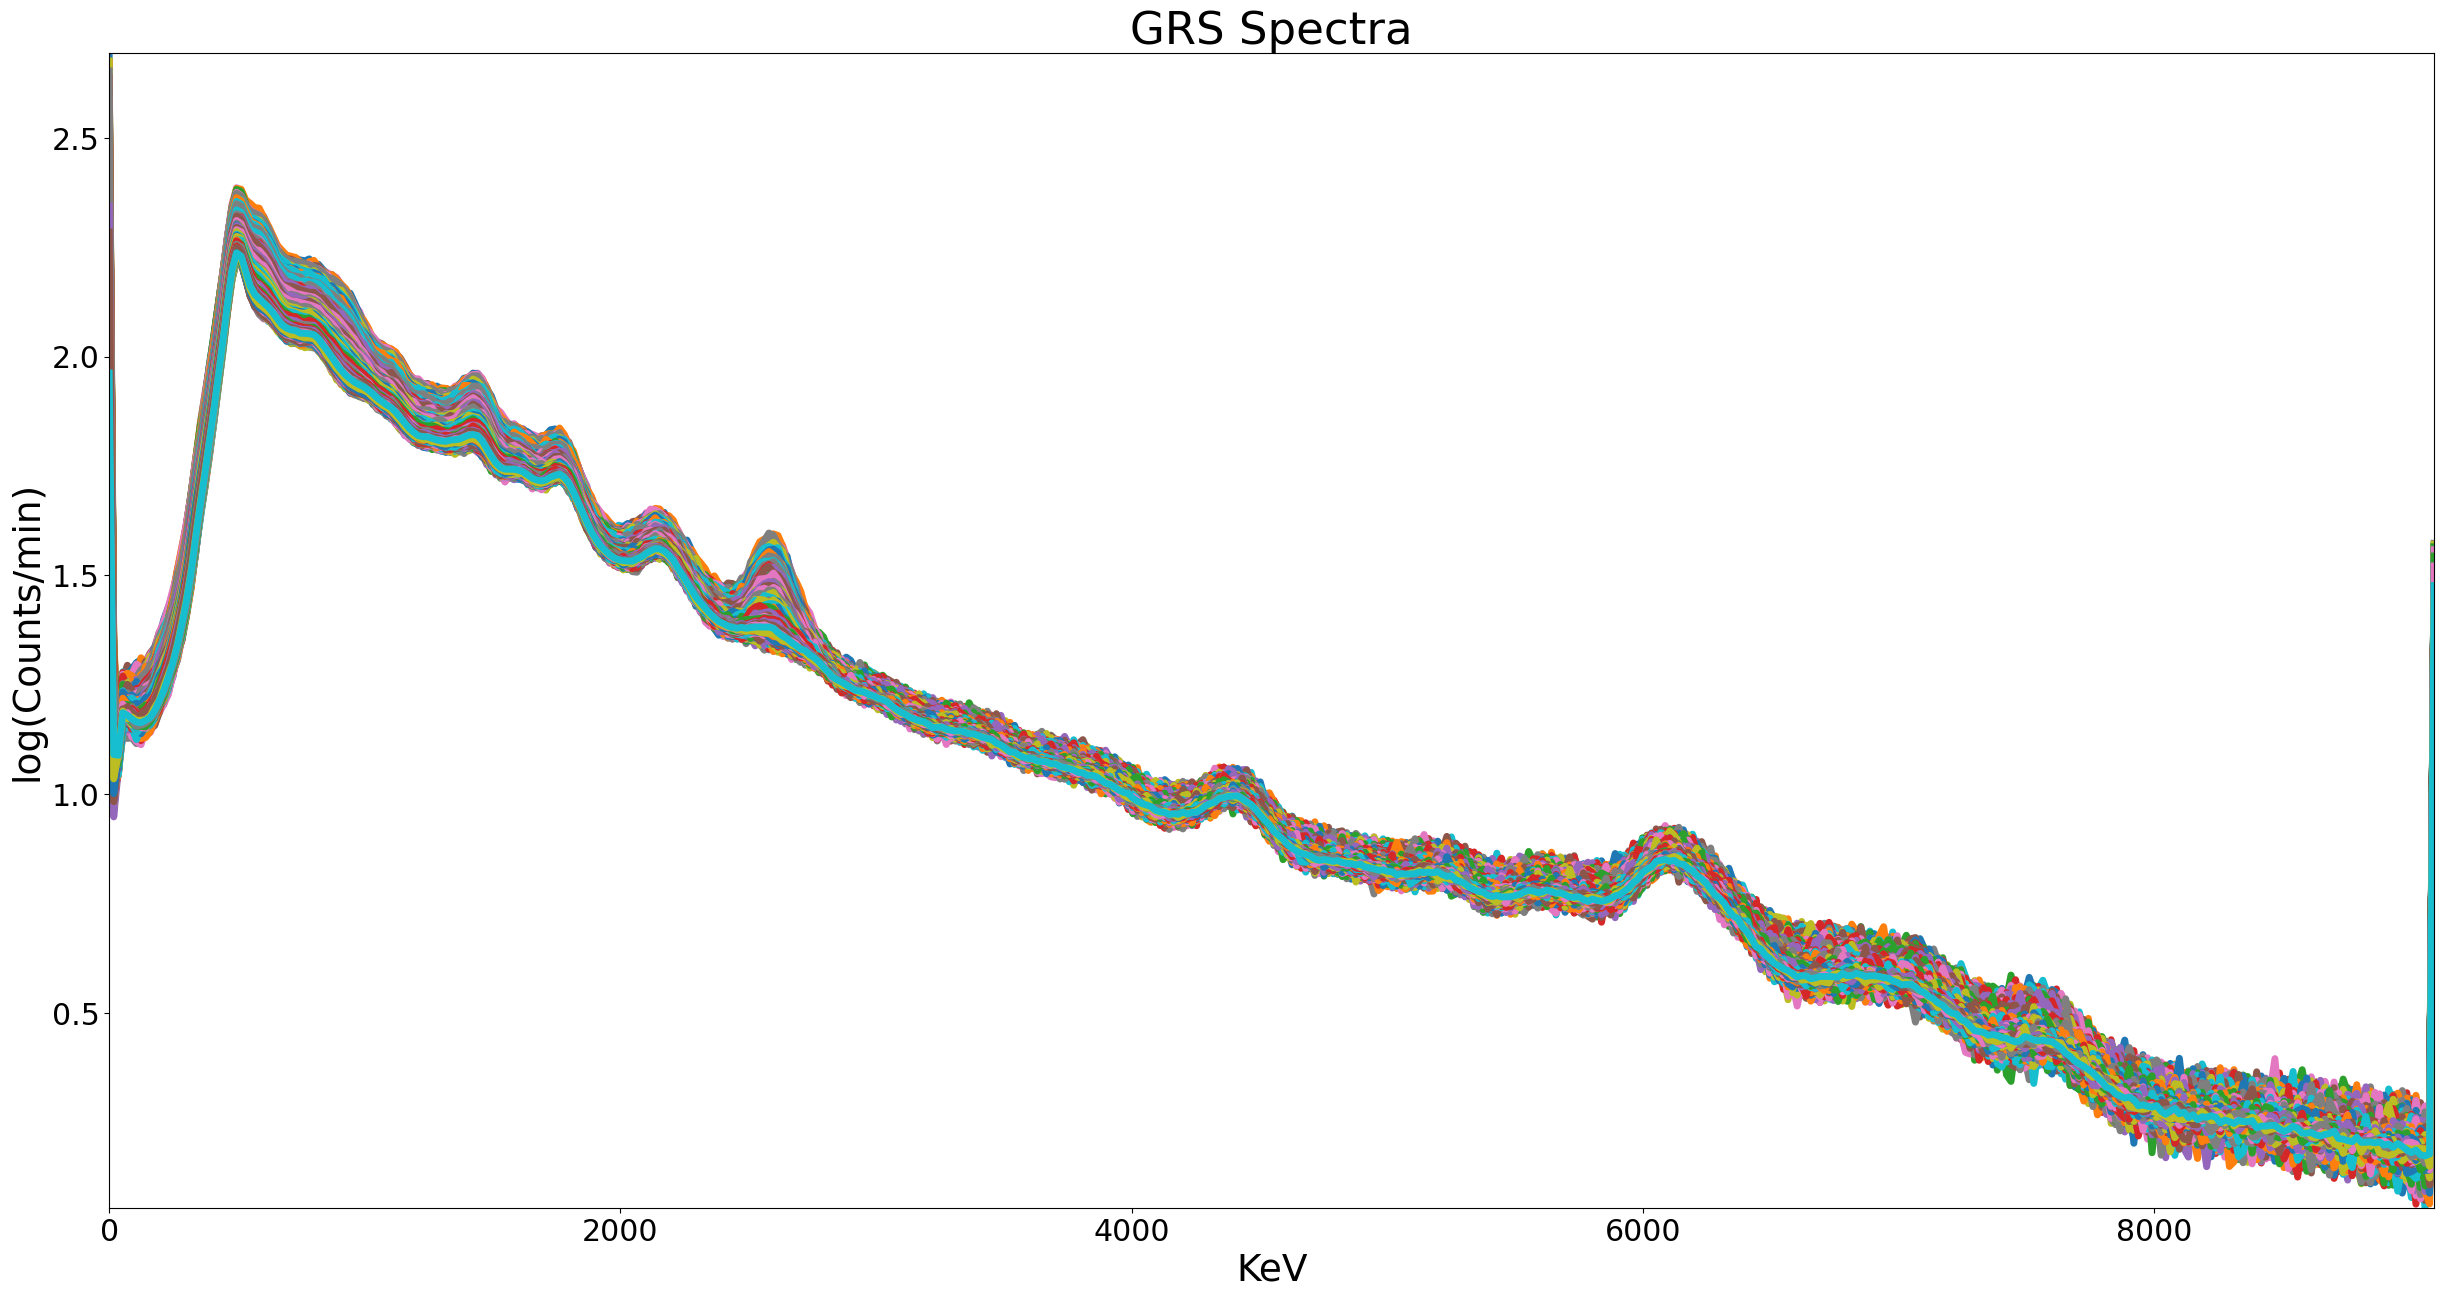

In [47]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(logScaledNormalizedSpectraPerSection.shape[0]):
    plt.plot(energyBands,
             logScaledNormalizedSpectraPerSection[i,:],
             lw=5)
#annotate the figure
plt.title("GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(fontsize=baseFontSize*1.2)
plt.yticks(fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min)",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [48]:
#get the index of band with 8900 keV
maxBand=np.argmin(np.abs(energyBands-8000))
minBand=np.argmin(np.abs(energyBands-511))
#remove the first tenbands
energyBands=energyBands[minBand:maxBand]
logScaledNormalizedSpectraPerSection=logScaledNormalizedSpectraPerSection[:,minBand:maxBand]

In [49]:
#remove the first two bands
energyBands=energyBands[1:]
logScaledNormalizedSpectraPerSection=logScaledNormalizedSpectraPerSection[:,1:]

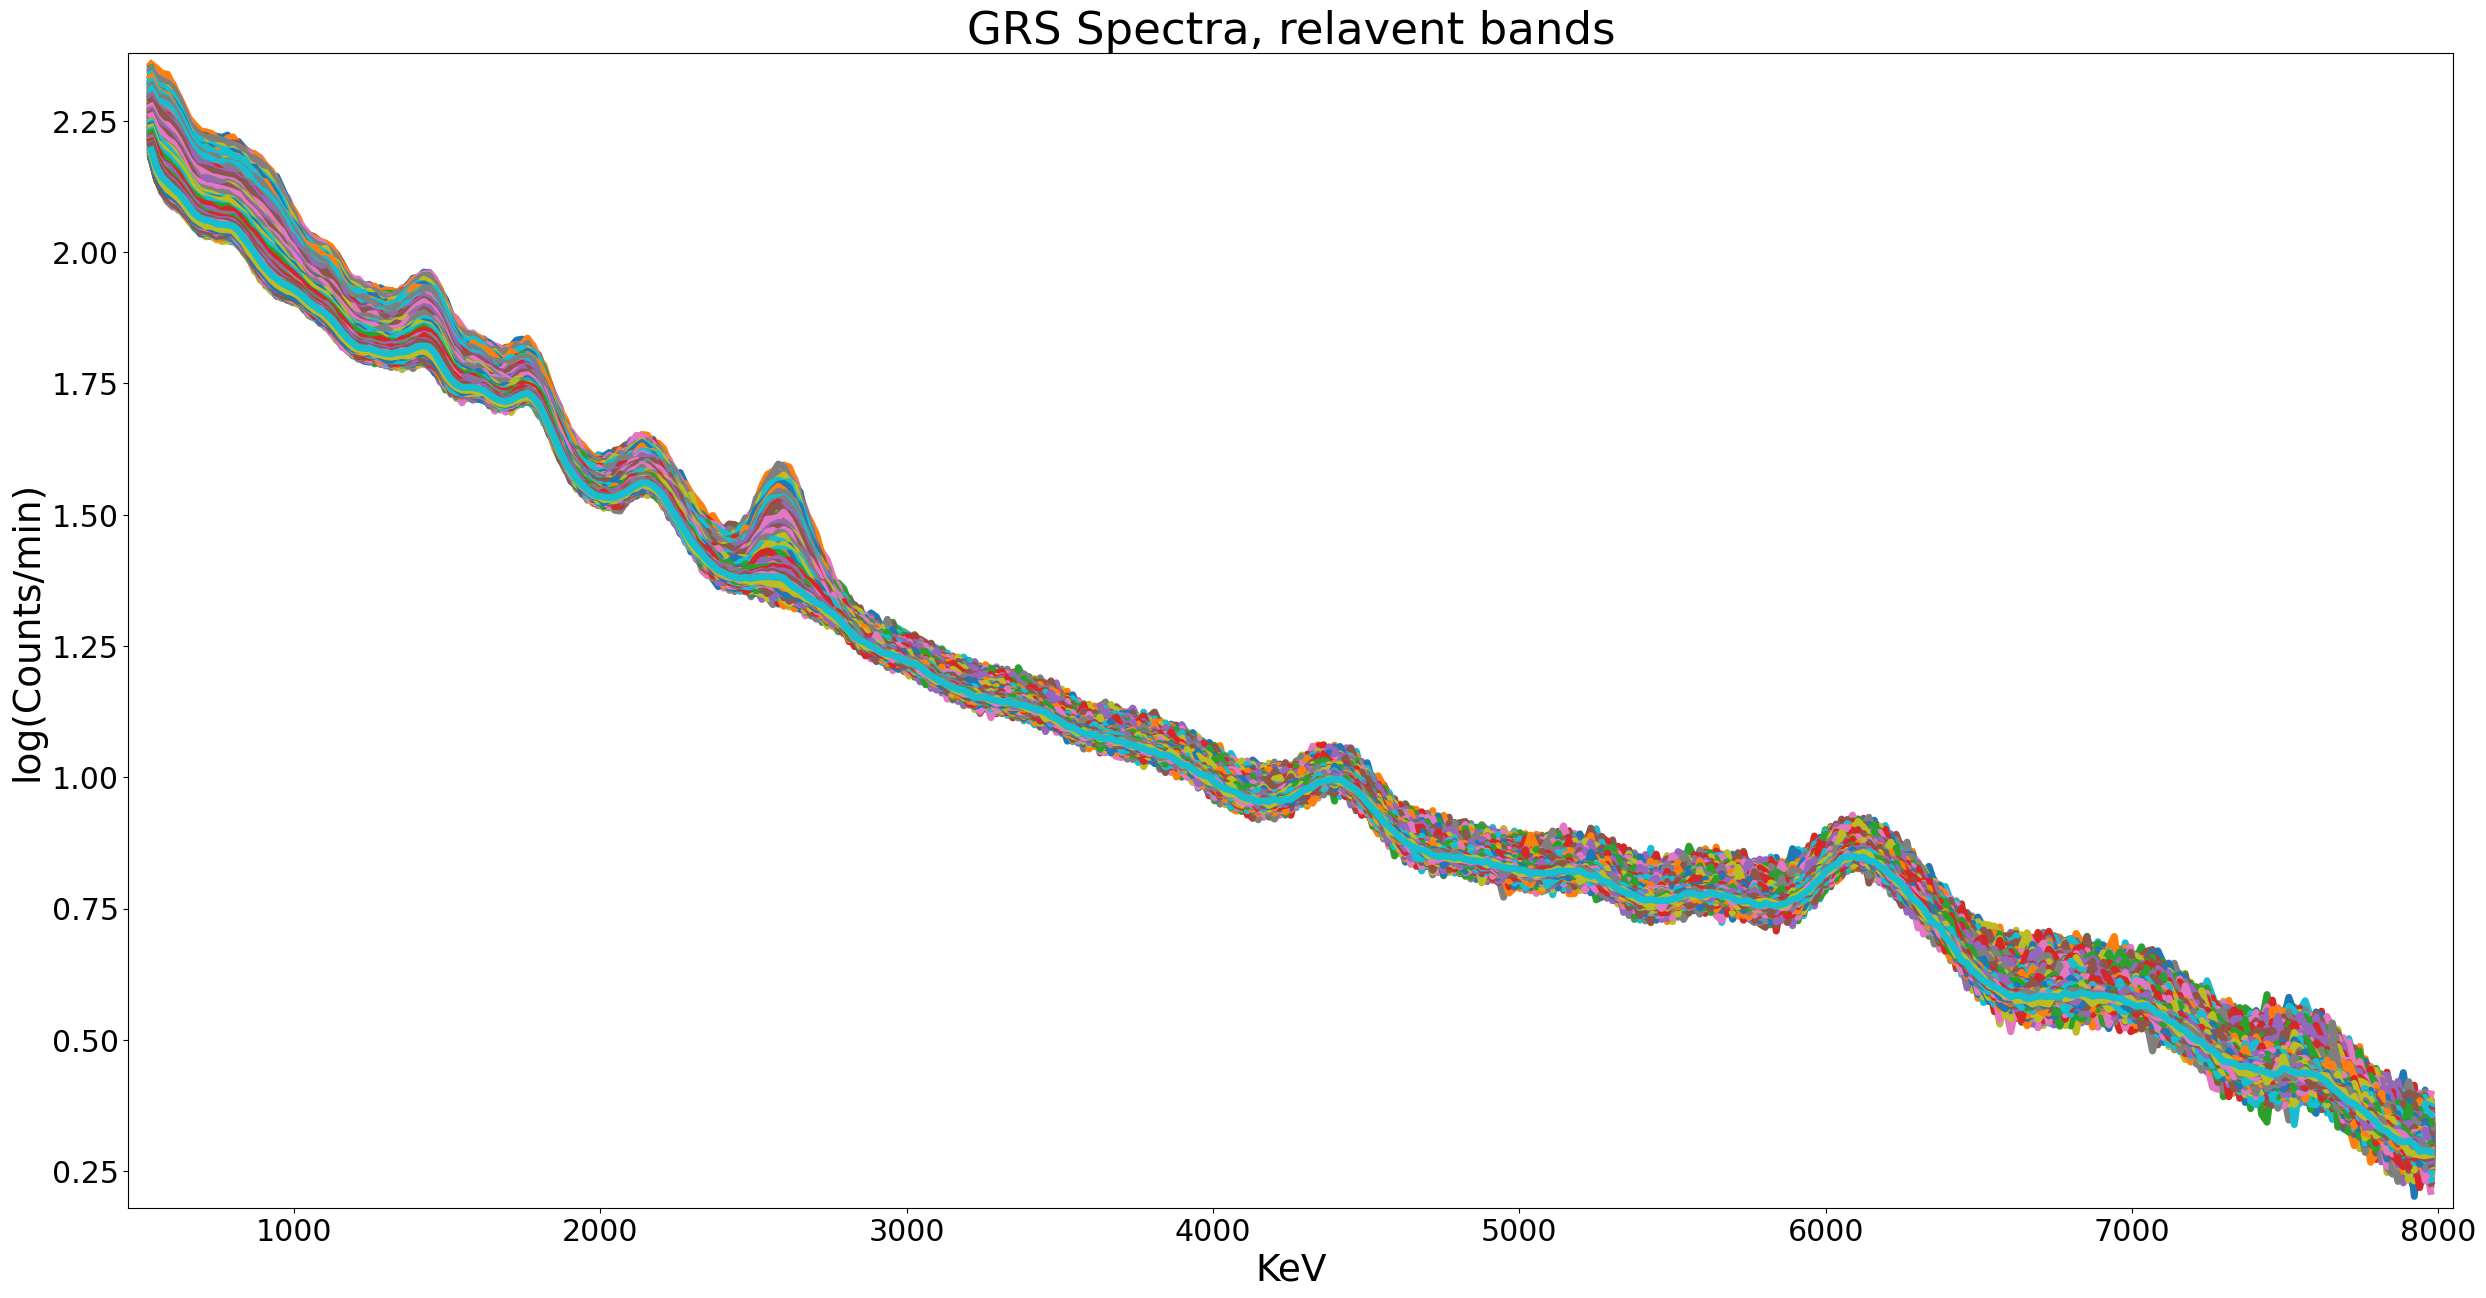

In [50]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(logScaledNormalizedSpectraPerSection.shape[0]):
    plt.plot(energyBands,
             logScaledNormalizedSpectraPerSection[i,:],
             lw=5)
#annotate the figure
plt.title("GRS Spectra, relavent bands",
          fontsize=baseFontSize*1.8)
plt.xticks(fontsize=baseFontSize*1.2)
plt.yticks(fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min)",
           fontsize=baseFontSize*1.5)
plt.margins(0.01)

In [51]:
#reflect the spectra along the line, y=max counts
logScaledNormalizedSpectraPerSection=np.amax(logScaledNormalizedSpectraPerSection)+(np.amax(logScaledNormalizedSpectraPerSection)-logScaledNormalizedSpectraPerSection)

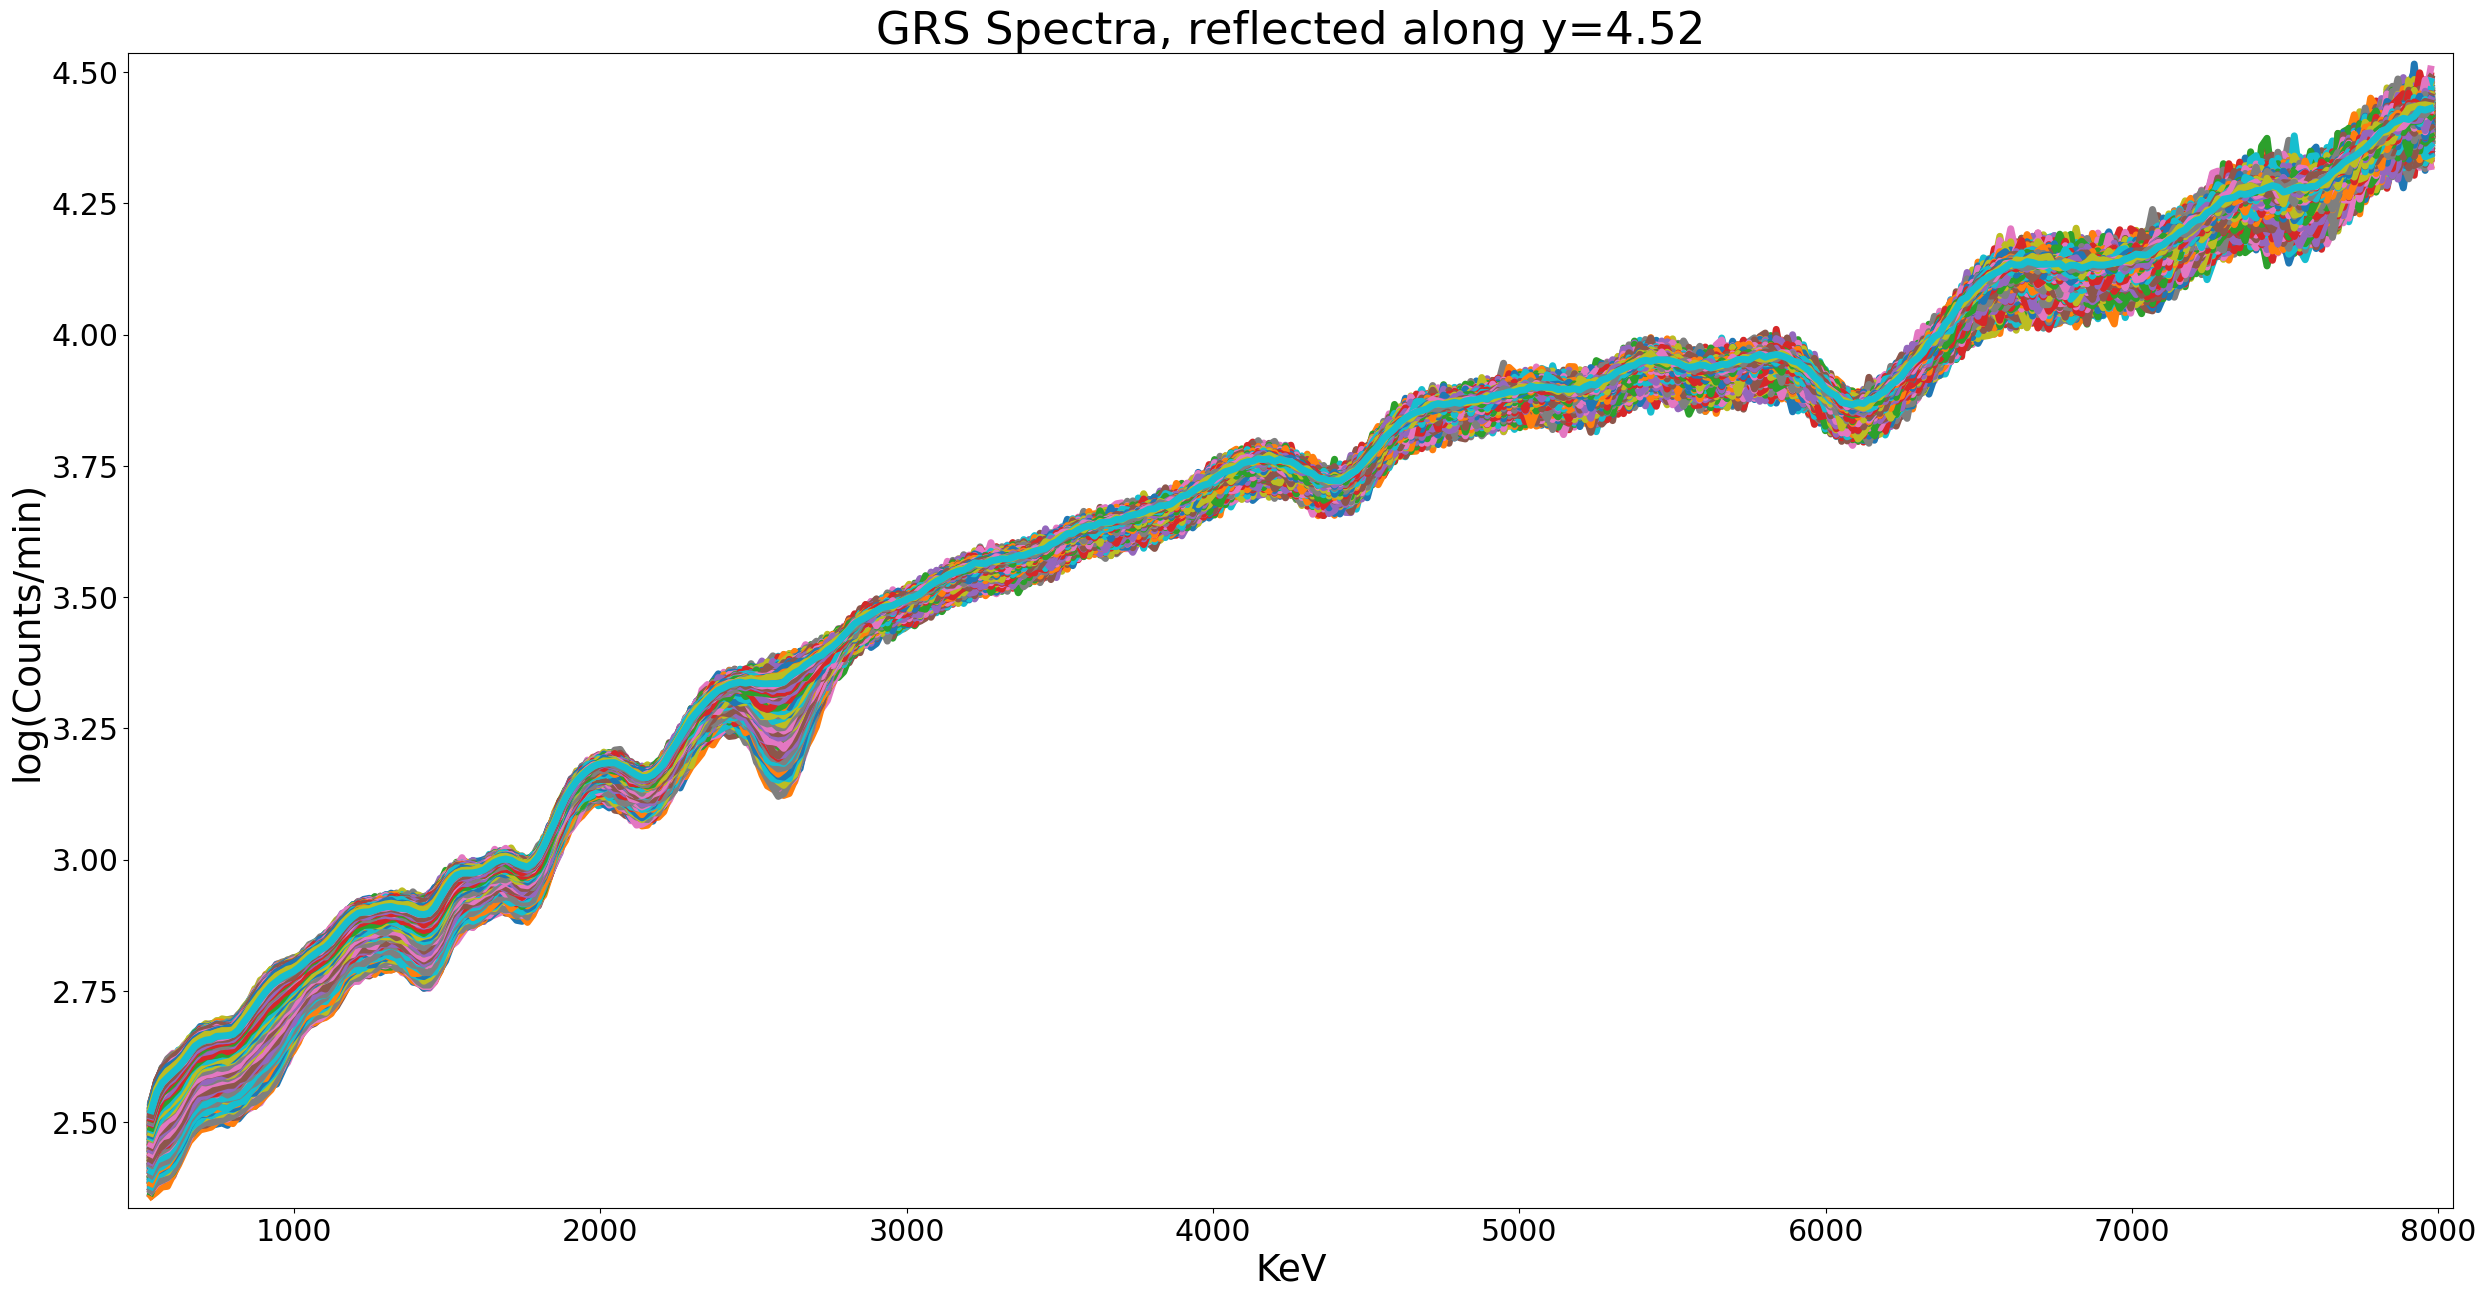

In [52]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(logScaledNormalizedSpectraPerSection.shape[0]):
    plt.plot(energyBands,
             logScaledNormalizedSpectraPerSection[i,:],
             lw=5)
#annotate the figure
plt.title("GRS Spectra, reflected along y="+str(round(np.amax(logScaledNormalizedSpectraPerSection),2)),
          fontsize=baseFontSize*1.8)
plt.xticks(fontsize=baseFontSize*1.2)
plt.yticks(fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min)",
           fontsize=baseFontSize*1.5)
plt.margins(0.01)

In [53]:
#import the function for convex hull removal from pysptools
from pysptools.spectro import convex_hull_removal

In [54]:
#iterate through all the spectra and remove the convex hull from them
for currentSpectraIndex in range(logScaledNormalizedSpectraPerSection.shape[0]):
    logScaledNormalizedSpectraPerSection[currentSpectraIndex,:]=convex_hull_removal(logScaledNormalizedSpectraPerSection[currentSpectraIndex,:],
                                                                                    energyBands)[0]

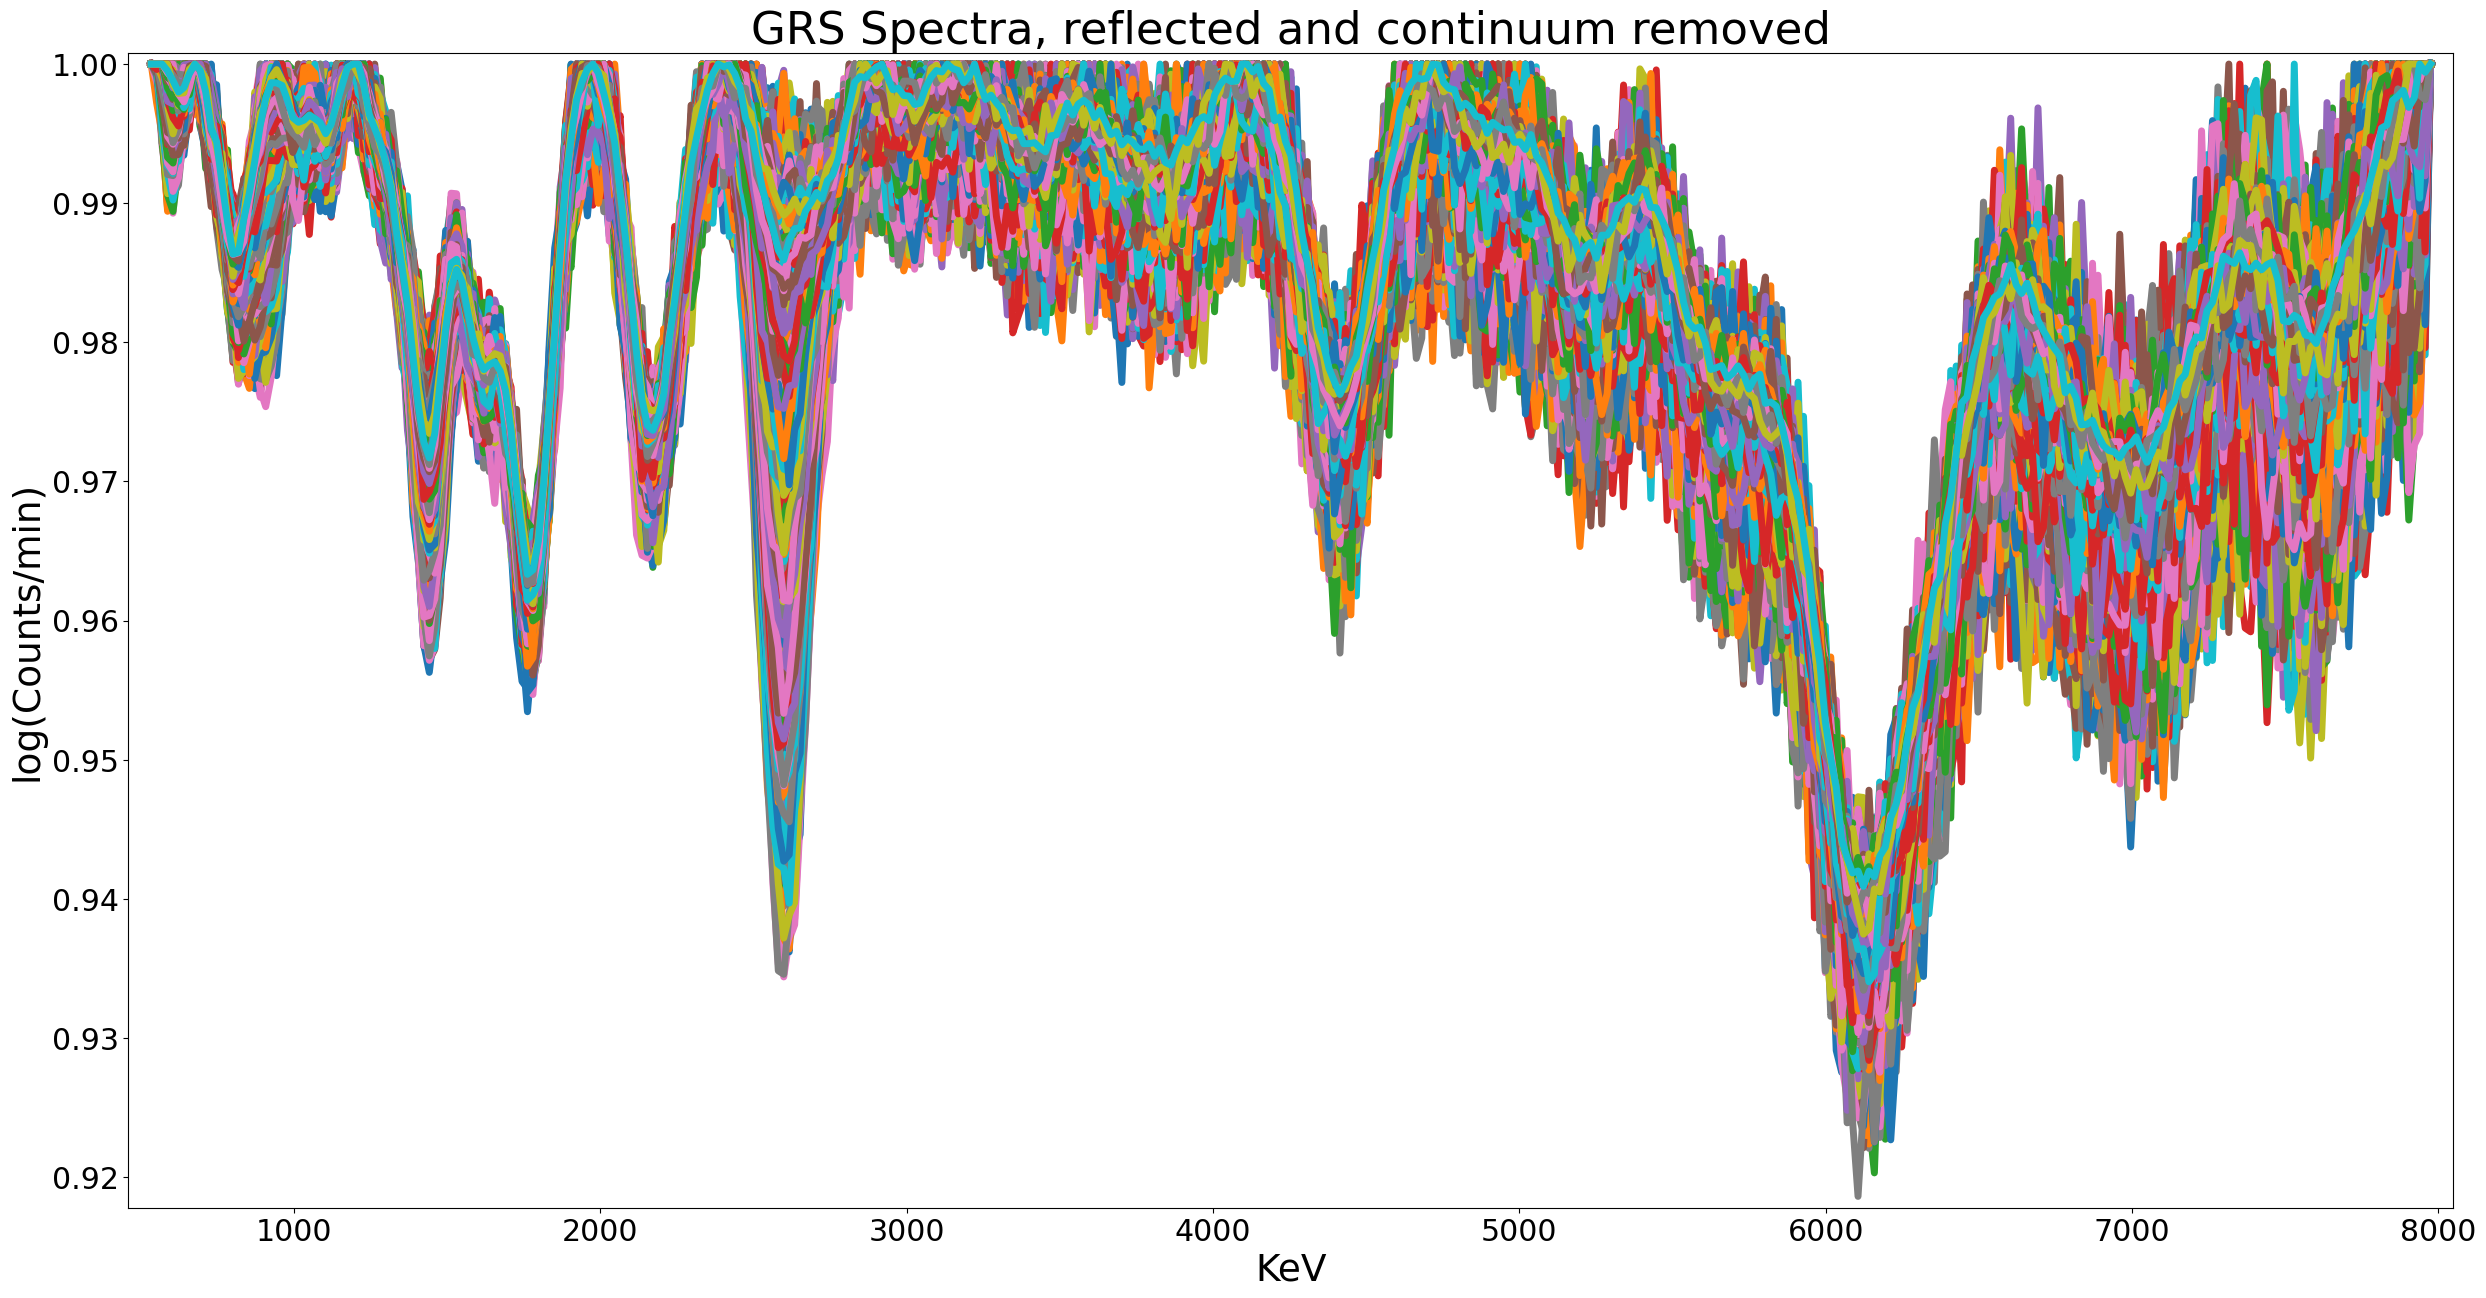

In [55]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(logScaledNormalizedSpectraPerSection.shape[0]):
    plt.plot(energyBands,
             logScaledNormalizedSpectraPerSection[i,:],
             lw=5)
#annotate the figure
plt.title("GRS Spectra, reflected and continuum removed",
          fontsize=baseFontSize*1.8)
plt.xticks(fontsize=baseFontSize*1.2)
plt.yticks(fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min)",
           fontsize=baseFontSize*1.5)
plt.margins(0.01)

In [56]:
#reflect the continuum removed spectra along the line, y=max counts
logScaledNormalizedSpectraPerSection=(np.amax(logScaledNormalizedSpectraPerSection)-logScaledNormalizedSpectraPerSection)

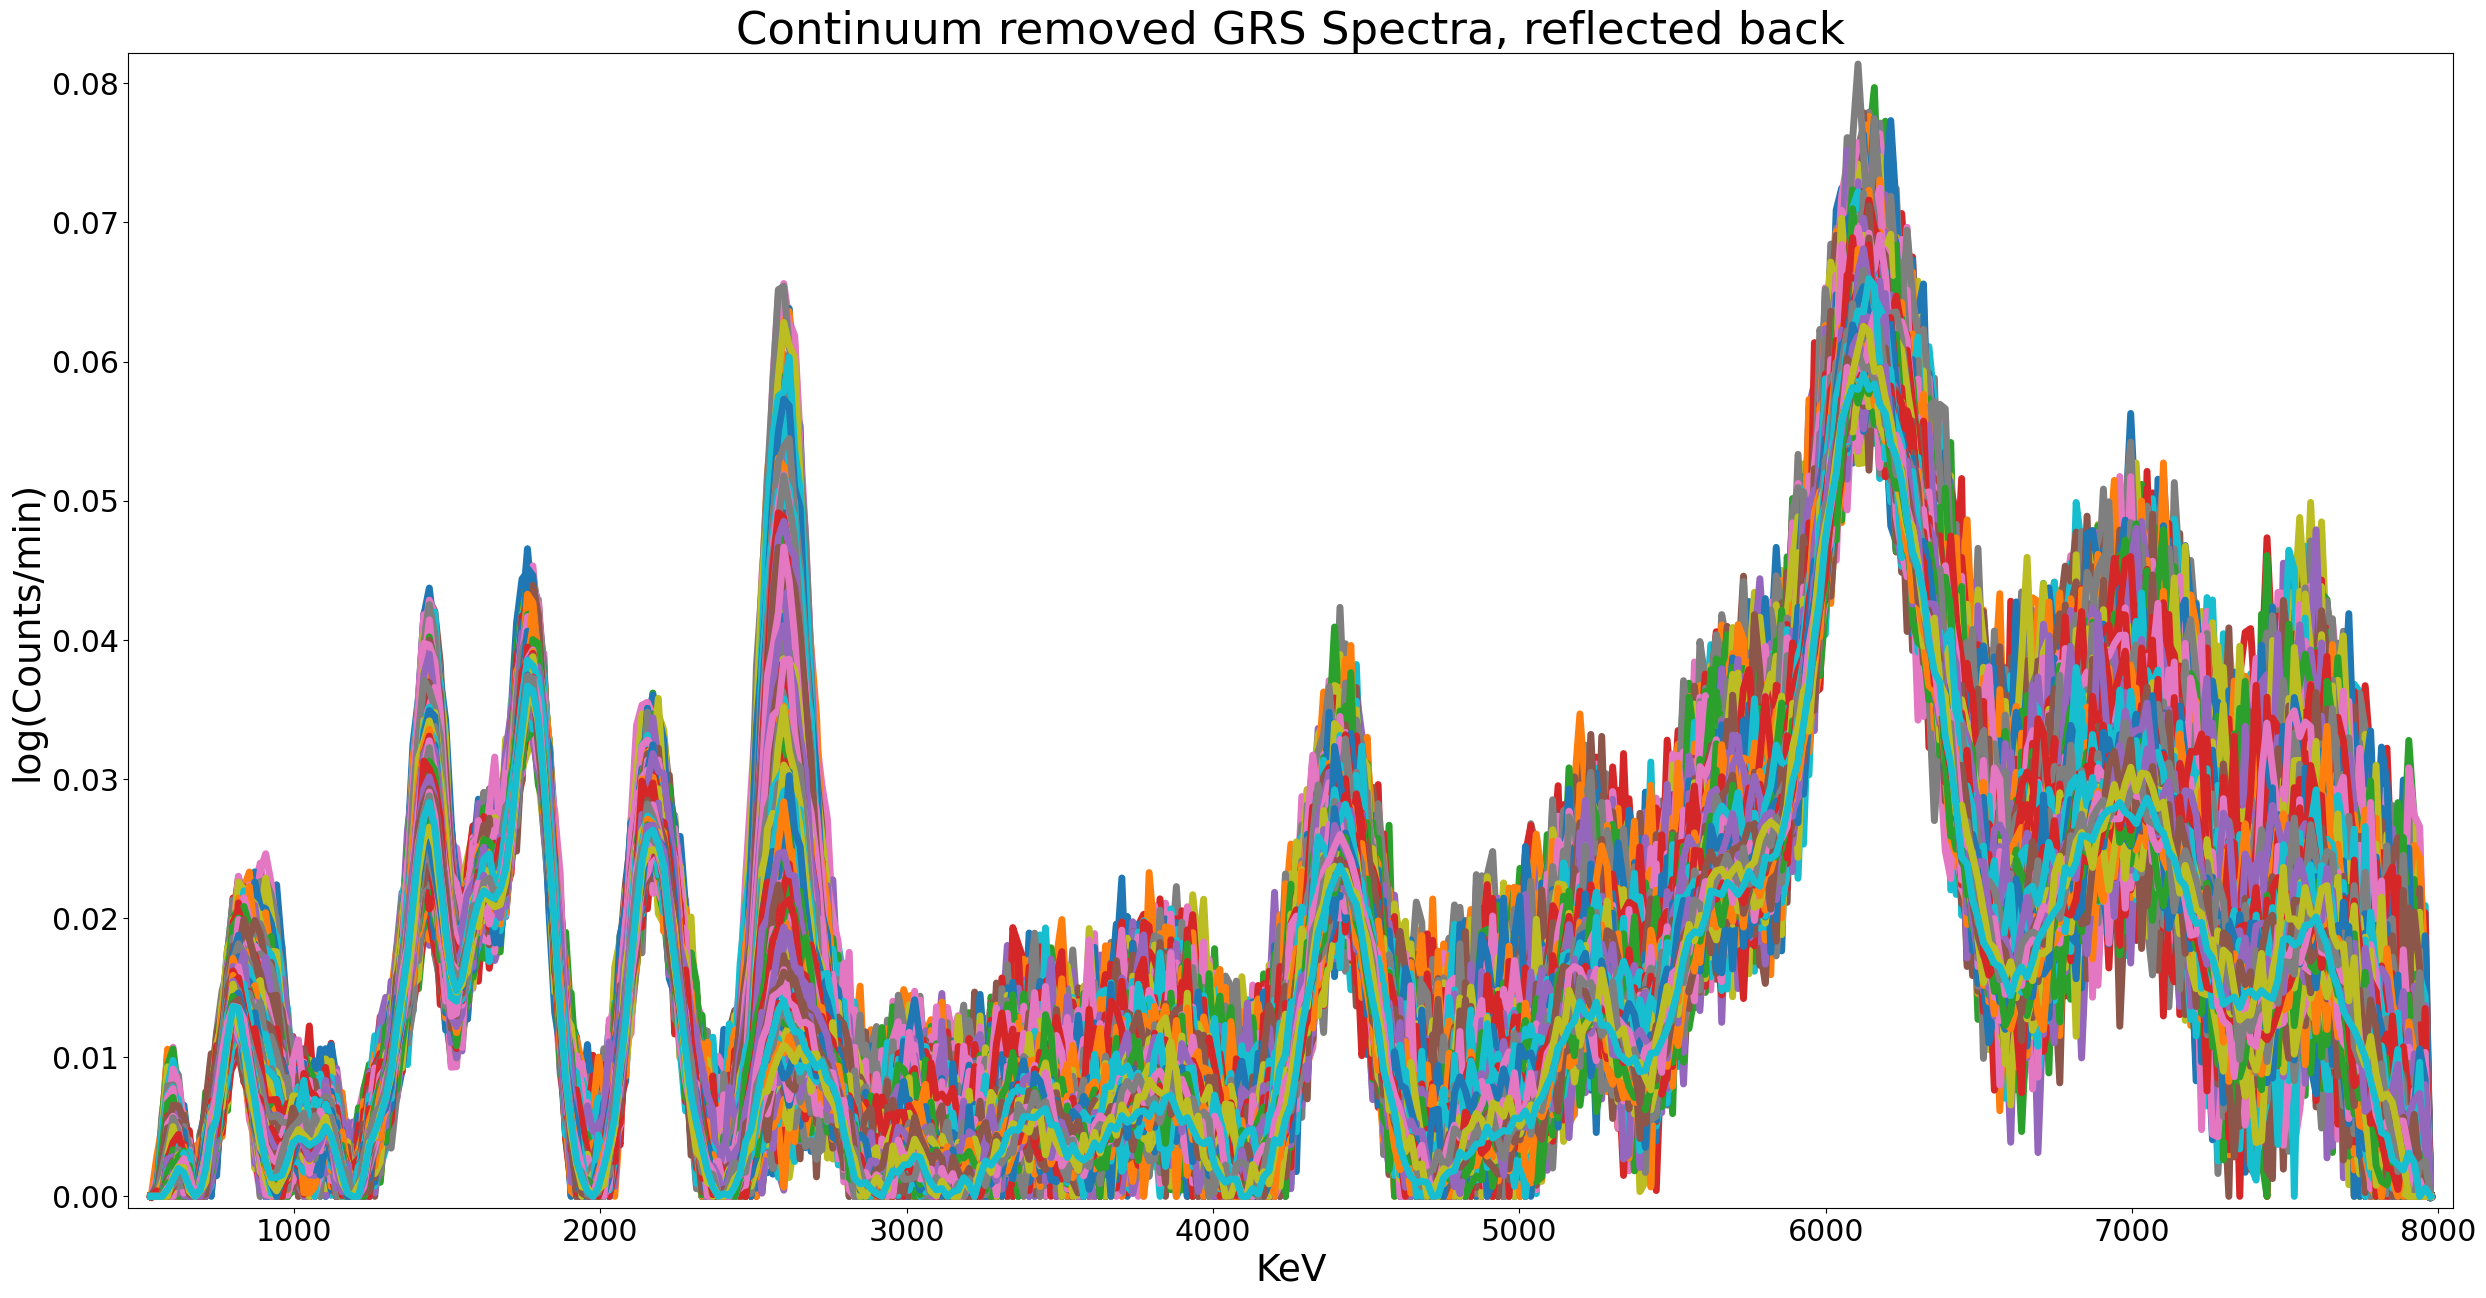

In [57]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(logScaledNormalizedSpectraPerSection.shape[0]):
    plt.plot(energyBands,
             logScaledNormalizedSpectraPerSection[i,:],
             lw=5)
#annotate the figure
plt.title("Continuum removed GRS Spectra, reflected back",
          fontsize=baseFontSize*1.8)
plt.xticks(fontsize=baseFontSize*1.2)
plt.yticks(fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min)",
           fontsize=baseFontSize*1.5)

plt.margins(0.01)

In [58]:
#normalize all the spectra
logScaledNormalizedSpectraPerSection=logScaledNormalizedSpectraPerSection/np.linalg.norm(logScaledNormalizedSpectraPerSection,axis=-1,keepdims=True)

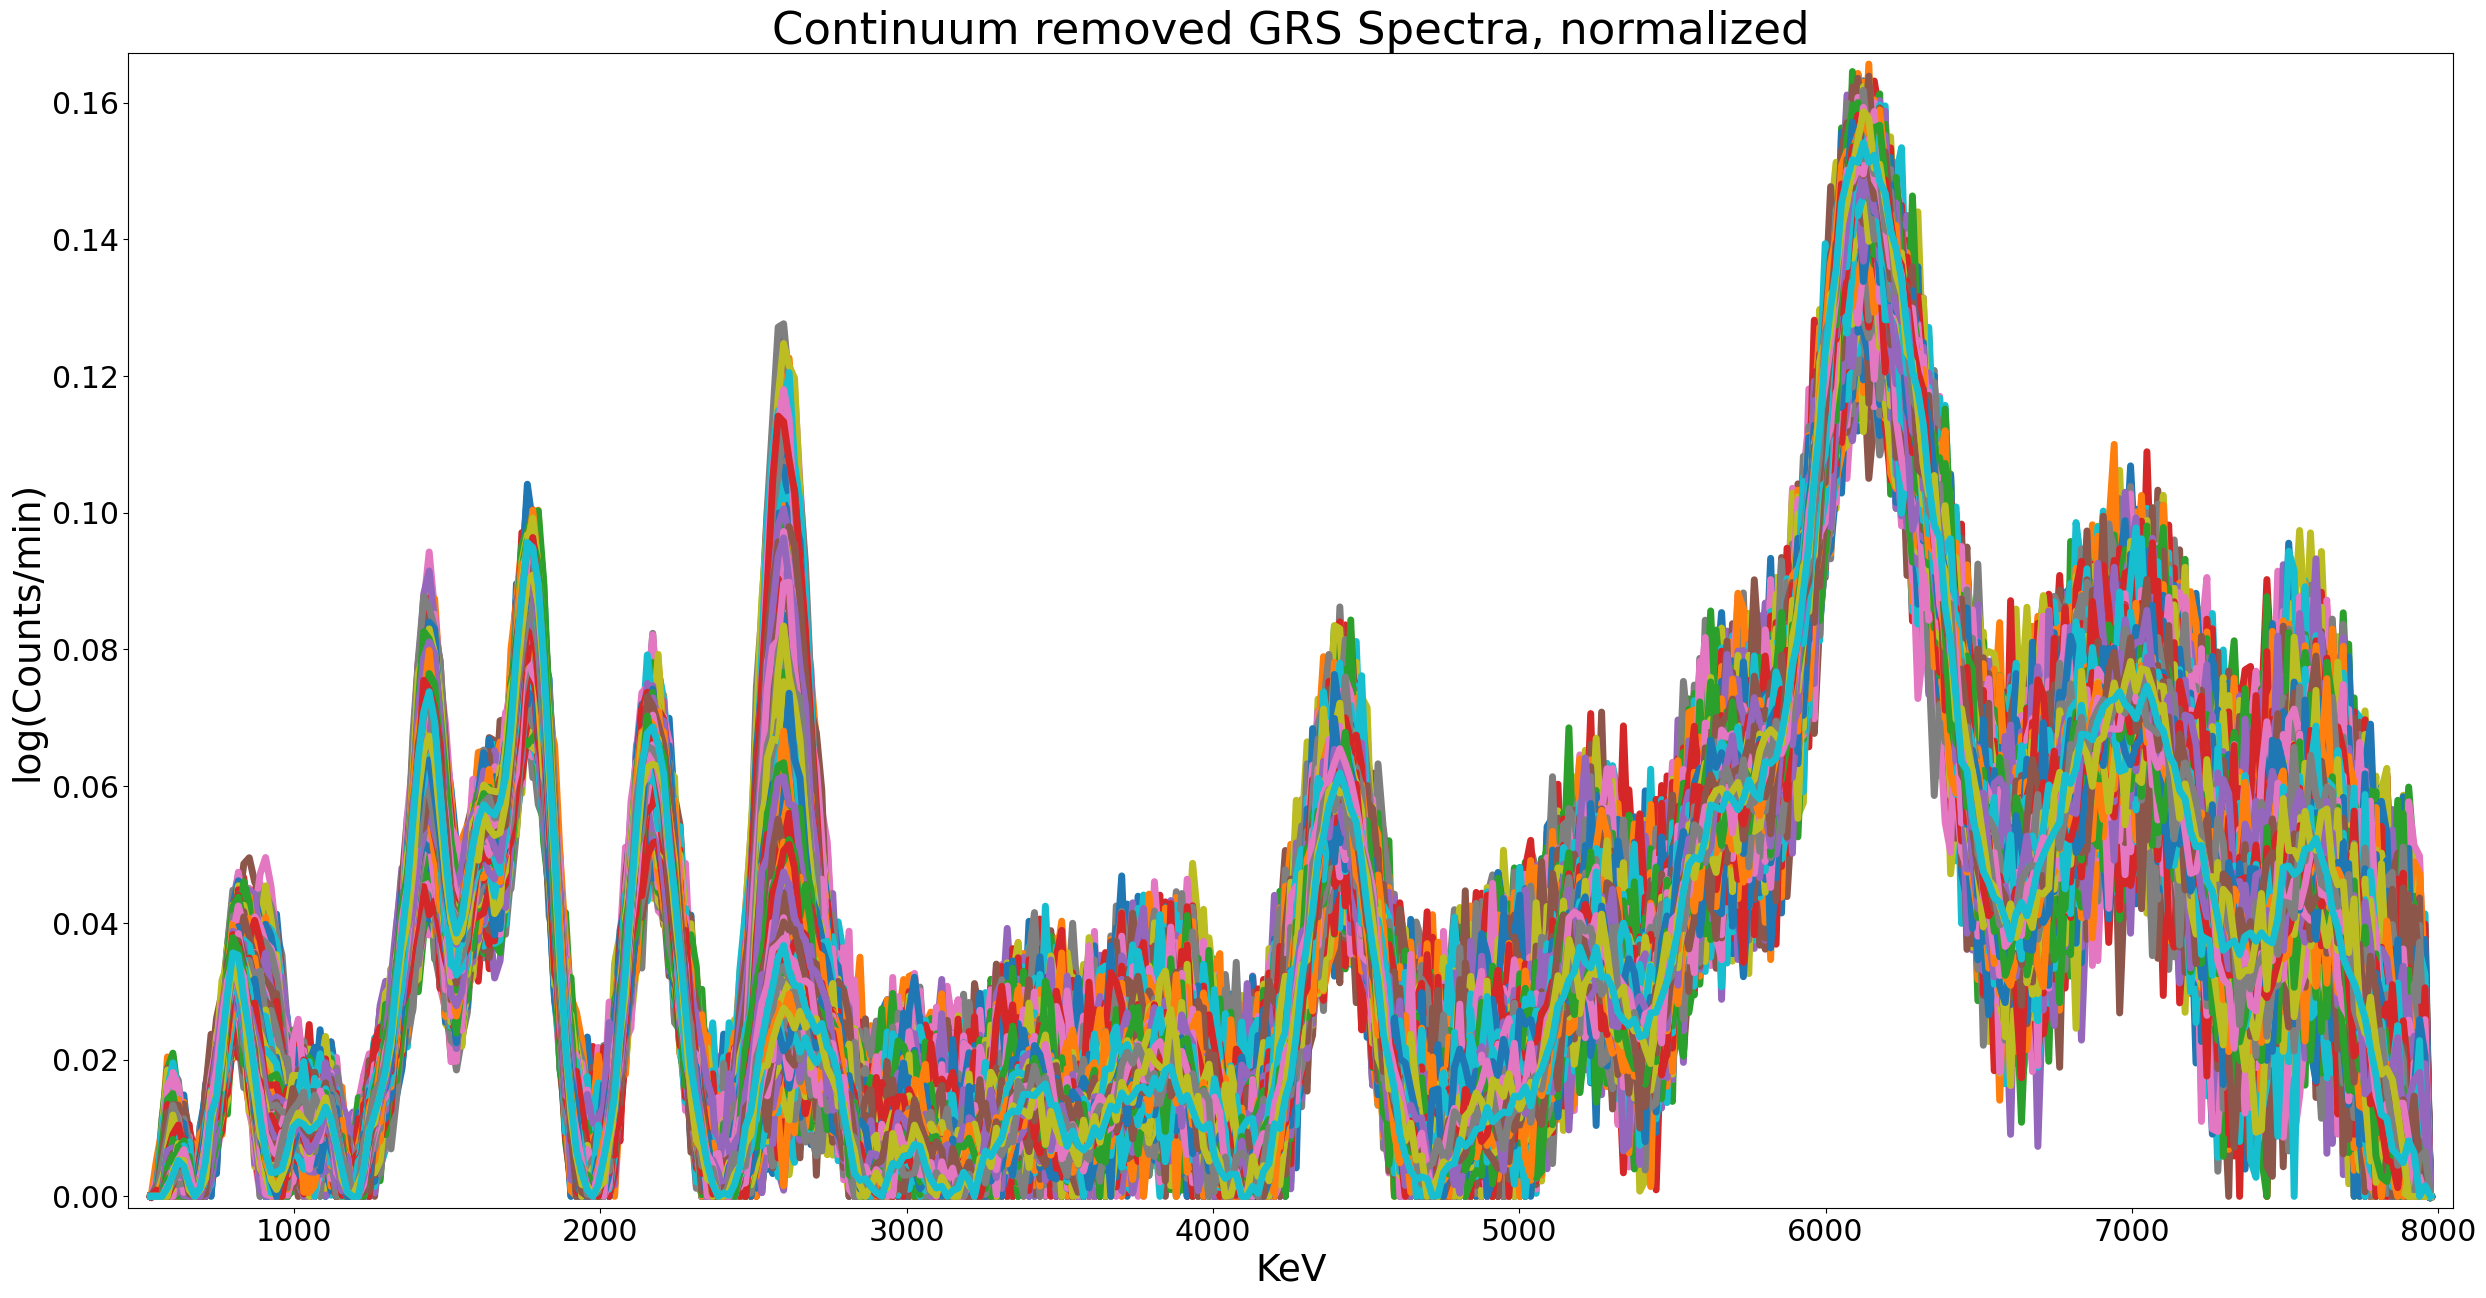

In [59]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(logScaledNormalizedSpectraPerSection.shape[0]):
    plt.plot(energyBands,
             logScaledNormalizedSpectraPerSection[i,:],
             lw=5)
#annotate the figure
plt.title("Continuum removed GRS Spectra, normalized",
          fontsize=baseFontSize*1.8)
plt.xticks(fontsize=baseFontSize*1.2)
plt.yticks(fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min)",
           fontsize=baseFontSize*1.5)

plt.margins(0.01)

In [60]:
#get the number of bands
noOfBands=logScaledNormalizedSpectraPerSection.shape[1]
print(f"No. of bands:{noOfBands}")

No. of bands:419


In [24]:
#set a global seed value
globalSeed=23

In [ ]:
#import tensorflow
import tensorflow as tf

In [25]:
#create an input layer
inputLayer=tf.keras.Input(shape=(noOfBands,1))

In [26]:
#add the input layer a neural network graph
nnGraph=inputLayer

In [27]:
#create a convolutional block
firstConvolutionalLayer=tf.keras.layers.Conv1D(filters=16,
                                               kernel_size=5,
                                               strides=3,
                                               padding='valid',
                                               name="1st_Conv_layer")
#add the 1st Conv layer to the graph
nnGraph=firstConvolutionalLayer(nnGraph)

#apply Relu activation
firstReluActivation=tf.keras.layers.Activation('relu',
                                               name="1st_Activation")
#add the 1st activation layer to the graph
nnGraph=firstReluActivation(nnGraph)

#apply batch normalization
firstBatchNormalization=tf.keras.layers.BatchNormalization(name="1st_Batch_Norm")
#add the 1st batch-norm layer to the graph
nnGraph=firstBatchNormalization(nnGraph)

#apply dropout
firstDropoutLayer=tf.keras.layers.Dropout(0.5,
                                          noise_shape=None,
                                          seed=globalSeed,
                                          name="1st_Dropout")
#add the 1st dropout layer to the graph
nnGraph=firstDropoutLayer(nnGraph)

In [28]:
#print the shape of the tensor outputed by the 1st convolutional block
print(nnGraph.shape)

(None, 139, 16)


In [29]:
#create a convolutional block
secondConvolutionalLayer=tf.keras.layers.Conv1D(filters=8,
                                               kernel_size=5,
                                               strides=3,
                                               padding='valid',
                                               name="2nd_Conv_layer")
#add the 2nd Conv layer to the graph
nnGraph=secondConvolutionalLayer(nnGraph)

#apply Relu activation
secondReluActivation=tf.keras.layers.Activation('relu',
                                               name="2nd_Activation")
#add the 2nd activation layer to the graph
nnGraph=secondReluActivation(nnGraph)

#apply batch normalization
secondBatchNormalization=tf.keras.layers.BatchNormalization(name="2nd_Batch_Norm")
#add the 2nd batch-norm layer to the graph
nnGraph=secondBatchNormalization(nnGraph)

#apply dropout
secondDropoutLayer=tf.keras.layers.Dropout(0.5,
                                          noise_shape=None,
                                          seed=globalSeed,
                                          name="2nd_Dropout")
#add the 2nd dropout layer to the graph
nnGraph=secondDropoutLayer(nnGraph)

In [30]:
#print the shape of the tensor outputed by the 2nd convolutional block
print(nnGraph.shape)

(None, 45, 8)


In [31]:
#create a convolutional block
thirdConvolutionalLayer=tf.keras.layers.Conv1D(filters=8,
                                               kernel_size=5,
                                               strides=3,
                                               padding='valid',
                                               name="3rd_Conv_layer")
#add the 3rd Conv layer to the graph
nnGraph=thirdConvolutionalLayer(nnGraph)

#apply Relu activation
thirdReluActivation=tf.keras.layers.Activation('relu',
                                               name="3rd_Activation")
#add the 3rd activation layer to the graph
nnGraph=thirdReluActivation(nnGraph)

#apply batch normalization
thirdBatchNormalization=tf.keras.layers.BatchNormalization(name="3rd_Batch_Norm")
#add the 3rd batch-norm layer to the graph
nnGraph=thirdBatchNormalization(nnGraph)

#apply dropout
thirdDropoutLayer=tf.keras.layers.Dropout(0.5,
                                          noise_shape=None,
                                          seed=globalSeed,
                                          name="3rd_Dropout")
#add the 3rd dropout layer to the graph
nnGraph=thirdDropoutLayer(nnGraph)

In [32]:
#print the shape of the tensor outputed by the 3rd convolutional block
print(nnGraph.shape)

(None, 14, 8)


In [33]:
#create a flatten layer to flatten the features extracted by the convolutional blocks
flattenedFeatures=tf.keras.layers.Flatten()
#add the flatten layer to the graph
nnGraph=flattenedFeatures(nnGraph)

In [34]:
#print the shape of the flattened feature vector
print(nnGraph.shape)

(None, 112)


In [35]:
#add a fully connected layer to the network
firstFullyConnectedLayer=tf.keras.layers.Dense(24,
                                               activation='relu',
                                               name="1st_Fully_Connected_Layer")
nnGraph=firstFullyConnectedLayer(nnGraph)

In [36]:
#print the no. of nodes in the 1st fully-connected layer
print(nnGraph.shape)

(None, 24)


In [37]:
#add a fully connected layer to the network (output layer)
secondFullyConnectedLayer=tf.keras.layers.Dense(1,
                                                activation='relu',
                                                name="2st_Fully_Connected_Layer")
nnGraph=secondFullyConnectedLayer(nnGraph)

In [38]:
#print the no. of nodes in the 2nd fully-connected layer
print(nnGraph.shape)

(None, 1)


In [39]:
#build the model
abundanceEstimator=tf.keras.Model(inputs=inputLayer,
                                  outputs=nnGraph,
                                  name="Single_Mineral_Abundance_Estimator")

In [40]:
#select the mineral whose abundance is to be estimated
for i,currentElementName in zip(range(len(elementNames)),elementNames):
    print(f"{i}---{currentElementName}")

0---Aluminum
1---Calcium
2---Iron
3---Magnesium
4---Oxygen
5---Potassium
6---Silicon
7---Thorium
8---Titanium
9---Uranium


In [101]:
#build the model
abundanceEstimator=tf.keras.Model(inputs=inputLayer,
                                  outputs=nnGraph,
                                  name="Single_Mineral_Abundance_Estimator")

In [102]:
#set the address where the untrained model will be saved
untrainedModelAddress="E:/Ml4Sci_GRS_abundance_estimation/Models/untrainedSingleAbundanceModel.h5"
#save the untrained model
tf.keras.models.save_model(abundanceEstimator,
                           untrainedModelAddress,
                           overwrite=True)

In [103]:
#create the optimizer
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
#define the loss
lossCalculator=tf.keras.losses.MeanSquaredError()

#define the number of epochs
noOfEpochs=20000
#define the batch size
batchSize=179*8

In [104]:
#check if the GPU is available
if len(tf.config.list_physical_devices('GPU'))==1:
    print("GPU available")
else:
    print("GPU unavailable")

GPU available


In [105]:
#import sklearn
from sklearn.model_selection import KFold

In [106]:
#set no. of folds
noOfFolds=5
#create a K-Fold splitter
splitter=KFold(n_splits=noOfFolds,
               shuffle=True,
               random_state=globalSeed)

In [107]:
#create lists to hold training and test losses
trainingLosses=[]
testingLosses=[]


1---Aluminum
For 1st fold:
Epoch 0000	--	Training Loss 3628.98e-4	--	Testing Loss 2920.32e-4
Epoch 2000	--	Training Loss 85.2e-4	--	Testing Loss 88.94e-4
Epoch 4000	--	Training Loss 79.85e-4	--	Testing Loss 84.89e-4
Epoch 6000	--	Training Loss 61.56e-4	--	Testing Loss 69.55e-4
Epoch 8000	--	Training Loss 55.08e-4	--	Testing Loss 67.75e-4
Epoch 10000	--	Training Loss 51.19e-4	--	Testing Loss 63.39e-4
Epoch 12000	--	Training Loss 50.25e-4	--	Testing Loss 59.58e-4
Epoch 14000	--	Training Loss 47.0e-4	--	Testing Loss 56.66e-4
Epoch 16000	--	Training Loss 44.81e-4	--	Testing Loss 55.0e-4
Epoch 18000	--	Training Loss 50.78e-4	--	Testing Loss 62.19e-4
Epoch 20000	--	Training Loss 49.39e-4	--	Testing Loss 54.53e-4
For 2st fold:
Epoch 0000	--	Training Loss 3607.0e-4	--	Testing Loss 2069.59e-4
Epoch 2000	--	Training Loss 86.91e-4	--	Testing Loss 90.55e-4
Epoch 4000	--	Training Loss 82.38e-4	--	Testing Loss 85.87e-4
Epoch 6000	--	Training Loss 78.96e-4	--	Testing Loss 84.99e-4
Epoch 8000	--	Train

Epoch 10000	--	Training Loss 89.71e-4	--	Testing Loss 94.08e-4
Epoch 12000	--	Training Loss 86.54e-4	--	Testing Loss 91.64e-4
Epoch 14000	--	Training Loss 85.21e-4	--	Testing Loss 91.24e-4
Epoch 16000	--	Training Loss 81.14e-4	--	Testing Loss 89.17e-4
Epoch 18000	--	Training Loss 79.9e-4	--	Testing Loss 89.27e-4
Epoch 20000	--	Training Loss 77.34e-4	--	Testing Loss 87.46e-4
3---Iron
For 1st fold:
Epoch 0000	--	Training Loss 631.88e-4	--	Testing Loss 460.5e-4
Epoch 2000	--	Training Loss 714.74e-4	--	Testing Loss 870.86e-4
Epoch 4000	--	Training Loss 714.74e-4	--	Testing Loss 870.86e-4
Epoch 6000	--	Training Loss 714.74e-4	--	Testing Loss 870.86e-4
Epoch 8000	--	Training Loss 714.74e-4	--	Testing Loss 870.86e-4
Epoch 10000	--	Training Loss 714.74e-4	--	Testing Loss 870.86e-4
Epoch 12000	--	Training Loss 714.74e-4	--	Testing Loss 870.86e-4
Epoch 14000	--	Training Loss 714.74e-4	--	Testing Loss 870.86e-4
Epoch 16000	--	Training Loss 714.74e-4	--	Testing Loss 870.86e-4
Epoch 18000	--	Traini

Epoch 20000	--	Training Loss 66.64e-4	--	Testing Loss 72.87e-4
For 5st fold:
Epoch 0000	--	Training Loss 1761.32e-4	--	Testing Loss 876.67e-4
Epoch 2000	--	Training Loss 106.43e-4	--	Testing Loss 109.55e-4
Epoch 4000	--	Training Loss 103.16e-4	--	Testing Loss 106.33e-4
Epoch 6000	--	Training Loss 99.93e-4	--	Testing Loss 104.25e-4
Epoch 8000	--	Training Loss 94.87e-4	--	Testing Loss 100.36e-4
Epoch 10000	--	Training Loss 78.43e-4	--	Testing Loss 93.12e-4
Epoch 12000	--	Training Loss 60.73e-4	--	Testing Loss 66.85e-4
Epoch 14000	--	Training Loss 55.29e-4	--	Testing Loss 60.57e-4
Epoch 16000	--	Training Loss 53.07e-4	--	Testing Loss 57.29e-4
Epoch 18000	--	Training Loss 51.75e-4	--	Testing Loss 56.15e-4
Epoch 20000	--	Training Loss 50.92e-4	--	Testing Loss 55.05e-4
5---Oxygen
For 1st fold:
Epoch 0000	--	Training Loss 4599.24e-4	--	Testing Loss 2720.27e-4
Epoch 2000	--	Training Loss 95.88e-4	--	Testing Loss 107.37e-4
Epoch 4000	--	Training Loss 83.98e-4	--	Testing Loss 91.85e-4
Epoch 6000

Epoch 2000	--	Training Loss 17.71e-4	--	Testing Loss 16.29e-4
Epoch 4000	--	Training Loss 15.81e-4	--	Testing Loss 15.42e-4
Epoch 6000	--	Training Loss 14.59e-4	--	Testing Loss 14.47e-4
Epoch 8000	--	Training Loss 14.06e-4	--	Testing Loss 15.07e-4
Epoch 10000	--	Training Loss 10.91e-4	--	Testing Loss 12.51e-4
Epoch 12000	--	Training Loss 10.58e-4	--	Testing Loss 12.03e-4
Epoch 14000	--	Training Loss 9.82e-4	--	Testing Loss 12.89e-4
Epoch 16000	--	Training Loss 8.59e-4	--	Testing Loss 10.63e-4
Epoch 18000	--	Training Loss 8.84e-4	--	Testing Loss 11.08e-4
Epoch 20000	--	Training Loss 7.78e-4	--	Testing Loss 10.72e-4
For 5st fold:
Epoch 0000	--	Training Loss 654.94e-4	--	Testing Loss 376.83e-4
Epoch 2000	--	Training Loss 17.22e-4	--	Testing Loss 16.29e-4
Epoch 4000	--	Training Loss 18.72e-4	--	Testing Loss 13.87e-4
Epoch 6000	--	Training Loss 12.86e-4	--	Testing Loss 12.49e-4
Epoch 8000	--	Training Loss 16.9e-4	--	Testing Loss 17.47e-4
Epoch 10000	--	Training Loss 11.51e-4	--	Testing Loss

Epoch 12000	--	Training Loss 548.03e-4	--	Testing Loss 547.19e-4
Epoch 14000	--	Training Loss 548.03e-4	--	Testing Loss 547.19e-4
Epoch 16000	--	Training Loss 548.03e-4	--	Testing Loss 547.19e-4
Epoch 18000	--	Training Loss 548.03e-4	--	Testing Loss 547.19e-4
Epoch 20000	--	Training Loss 548.03e-4	--	Testing Loss 547.19e-4
For 4st fold:
Epoch 0000	--	Training Loss 473.67e-4	--	Testing Loss 336.86e-4
Epoch 2000	--	Training Loss 543.19e-4	--	Testing Loss 566.57e-4
Epoch 4000	--	Training Loss 543.19e-4	--	Testing Loss 566.57e-4
Epoch 6000	--	Training Loss 543.19e-4	--	Testing Loss 566.57e-4
Epoch 8000	--	Training Loss 543.19e-4	--	Testing Loss 566.57e-4
Epoch 10000	--	Training Loss 543.19e-4	--	Testing Loss 566.57e-4
Epoch 12000	--	Training Loss 543.19e-4	--	Testing Loss 566.57e-4
Epoch 14000	--	Training Loss 543.19e-4	--	Testing Loss 566.57e-4
Epoch 16000	--	Training Loss 543.19e-4	--	Testing Loss 566.57e-4
Epoch 18000	--	Training Loss 543.19e-4	--	Testing Loss 566.57e-4
Epoch 20000	--	T

Epoch 18000	--	Training Loss 580.47e-4	--	Testing Loss 449.64e-4
Epoch 20000	--	Training Loss 580.47e-4	--	Testing Loss 449.64e-4
For 3st fold:
Epoch 0000	--	Training Loss 484.59e-4	--	Testing Loss 327.83e-4
Epoch 2000	--	Training Loss 554.78e-4	--	Testing Loss 552.42e-4
Epoch 4000	--	Training Loss 554.78e-4	--	Testing Loss 552.42e-4
Epoch 6000	--	Training Loss 554.78e-4	--	Testing Loss 552.42e-4
Epoch 8000	--	Training Loss 554.78e-4	--	Testing Loss 552.42e-4
Epoch 10000	--	Training Loss 554.78e-4	--	Testing Loss 552.42e-4
Epoch 12000	--	Training Loss 554.78e-4	--	Testing Loss 552.42e-4
Epoch 14000	--	Training Loss 554.78e-4	--	Testing Loss 552.42e-4
Epoch 16000	--	Training Loss 554.78e-4	--	Testing Loss 552.42e-4
Epoch 18000	--	Training Loss 554.78e-4	--	Testing Loss 552.42e-4
Epoch 20000	--	Training Loss 554.78e-4	--	Testing Loss 552.42e-4
For 4st fold:
Epoch 0000	--	Training Loss 479.37e-4	--	Testing Loss 338.11e-4
Epoch 2000	--	Training Loss 549.24e-4	--	Testing Loss 574.55e-4
Epoc

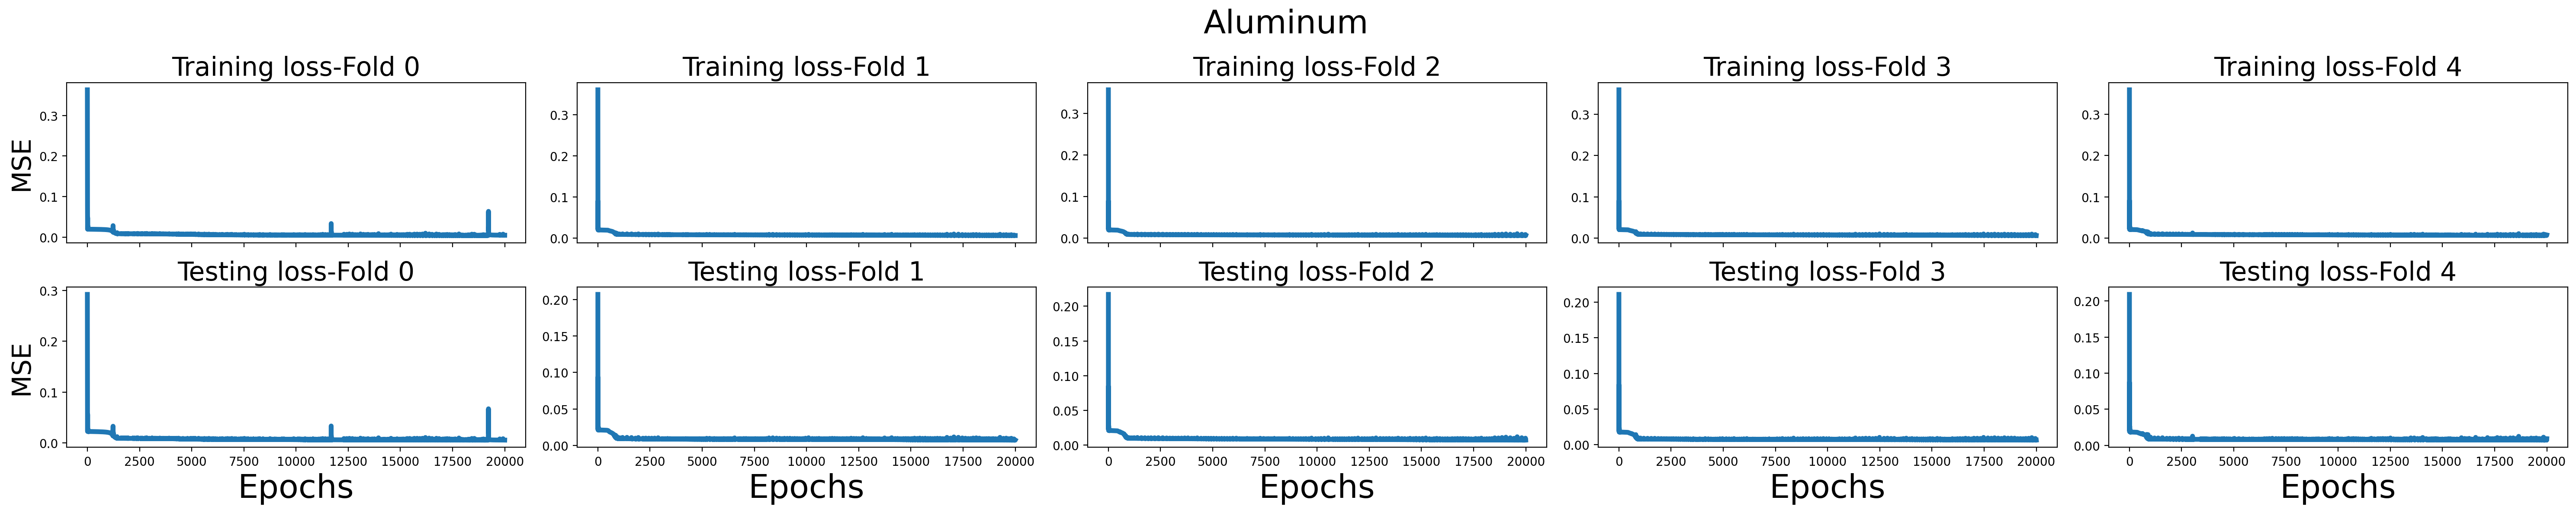

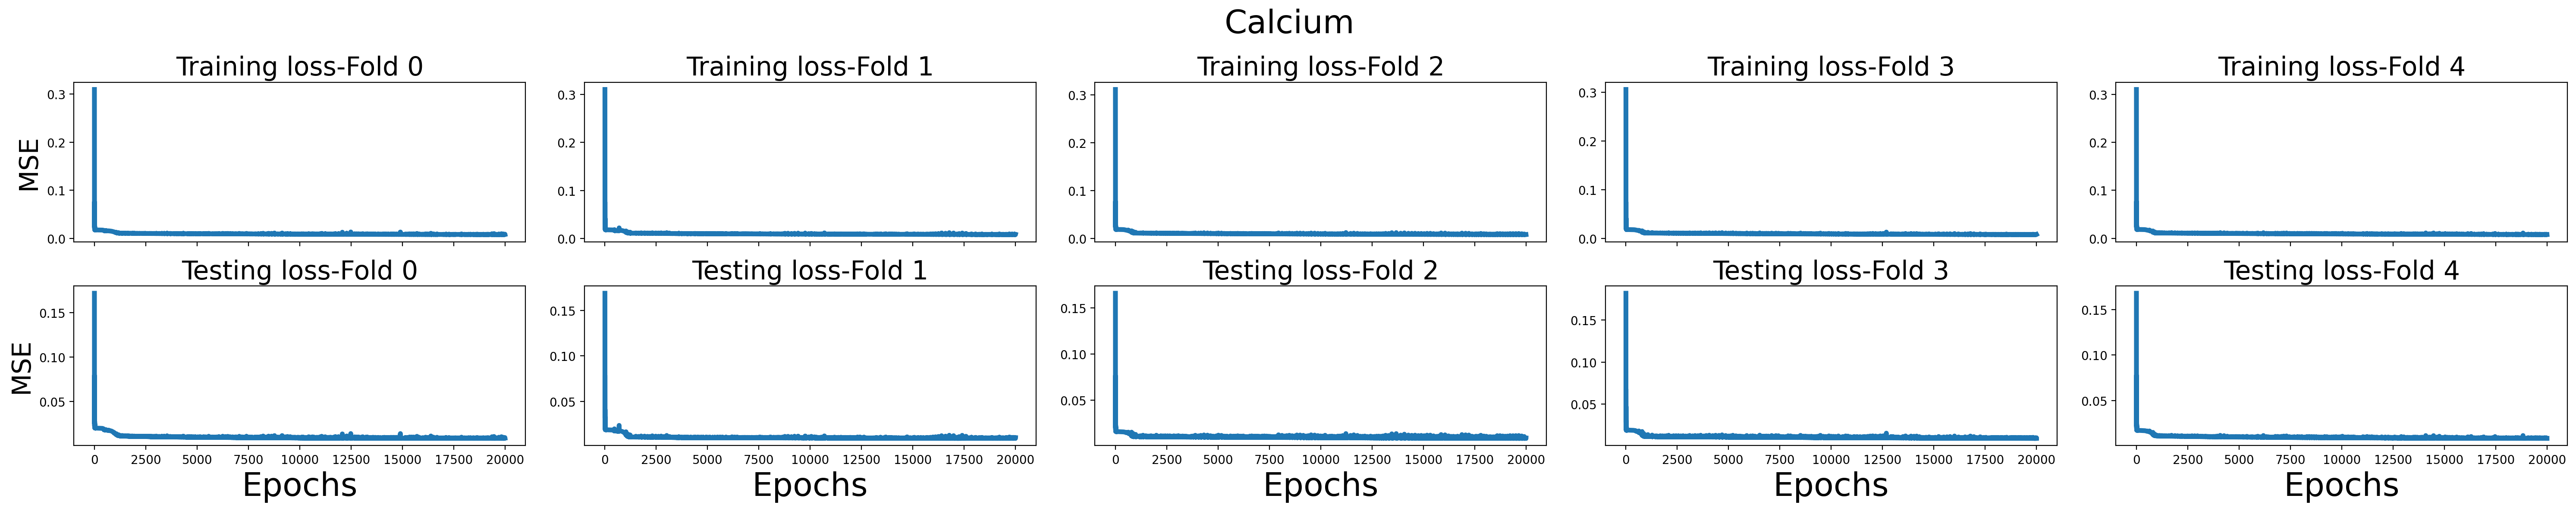

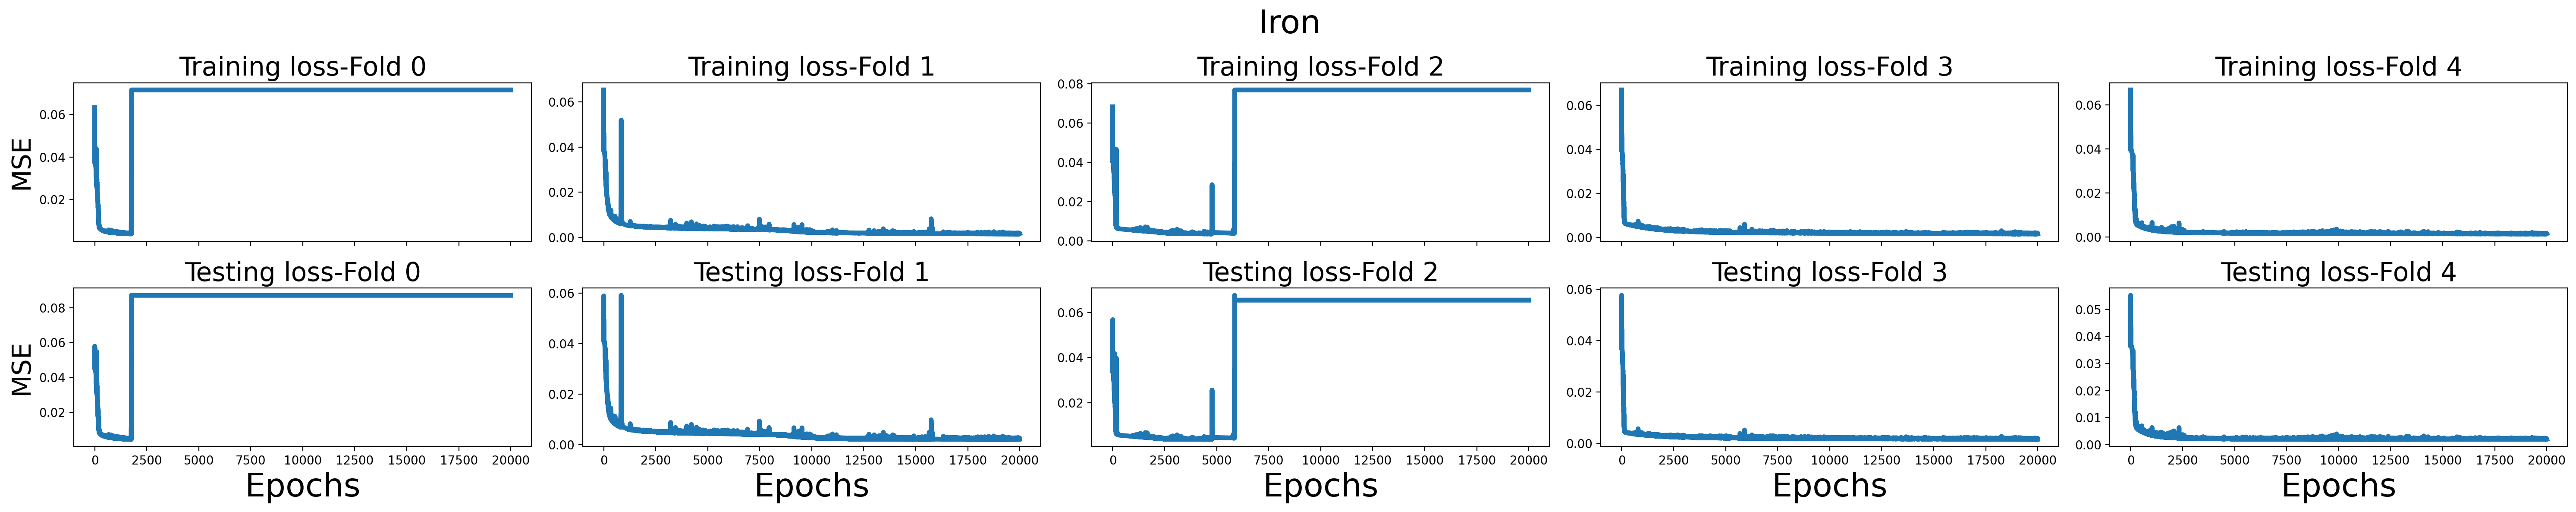

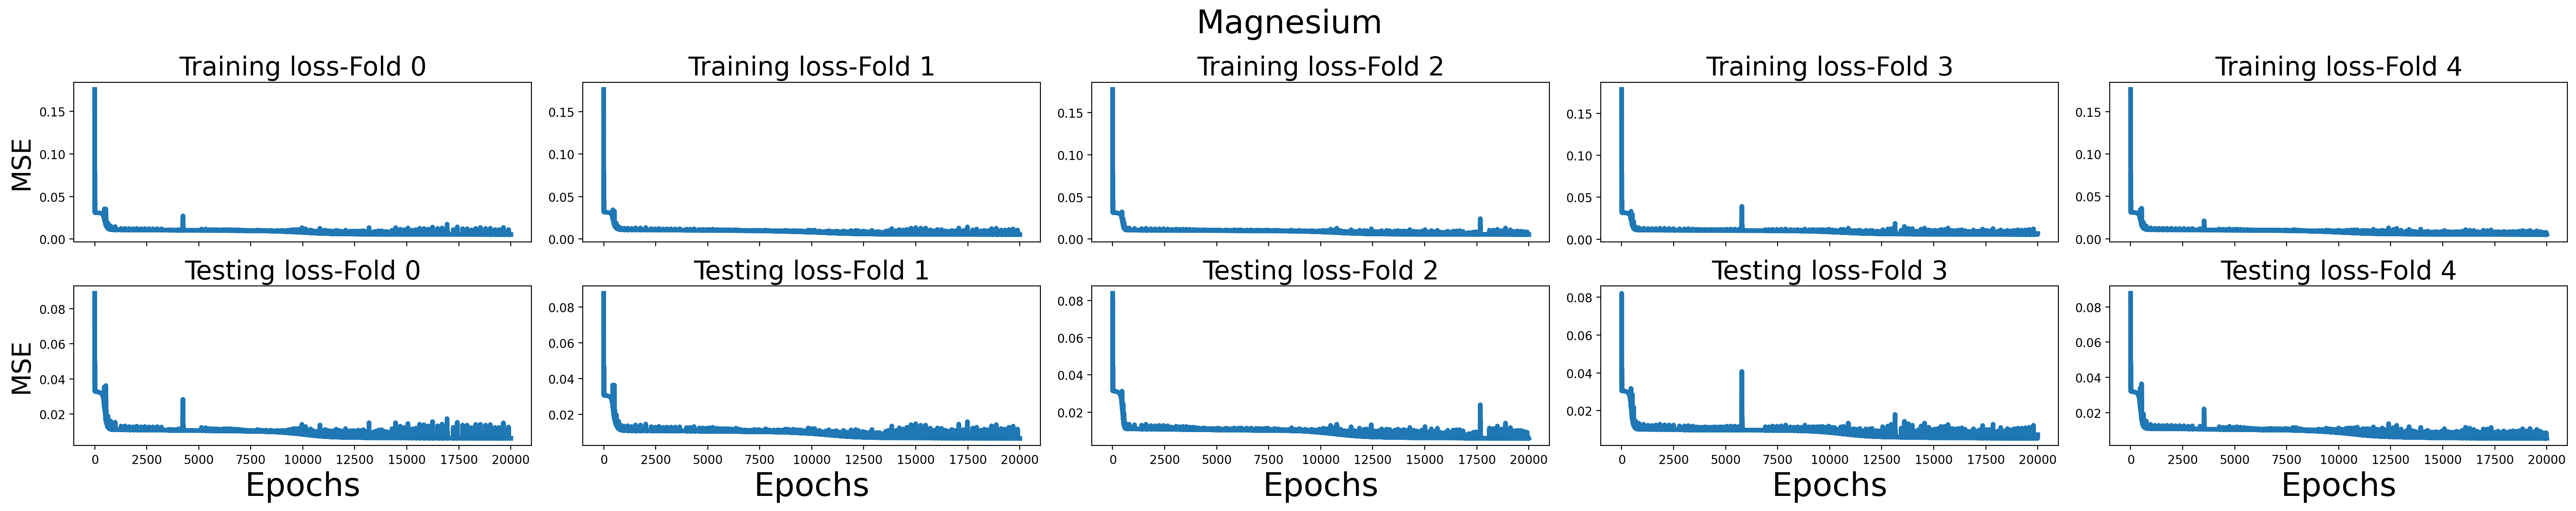

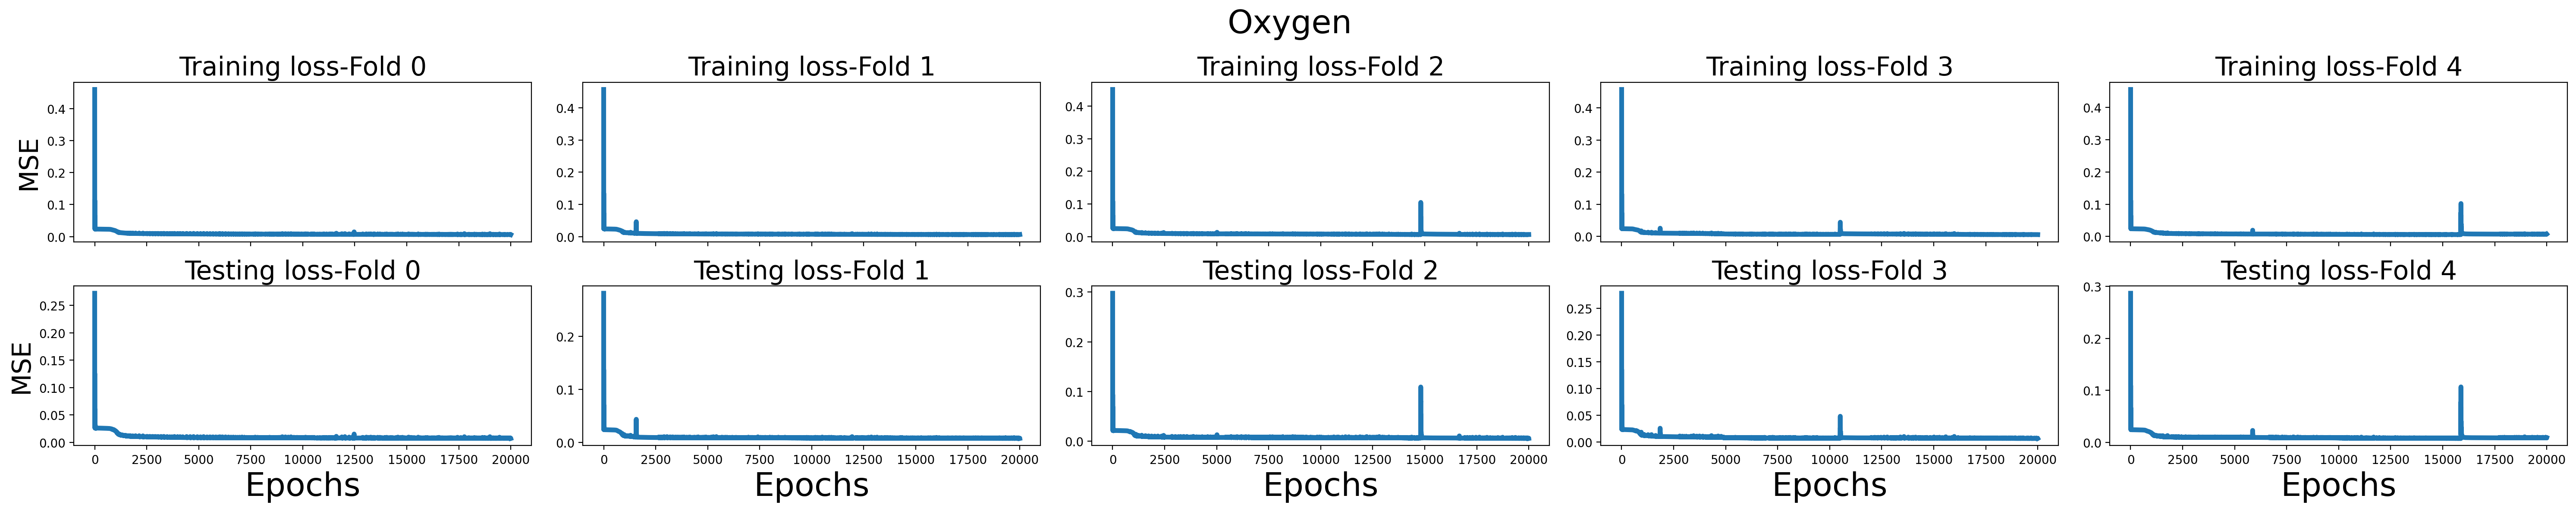

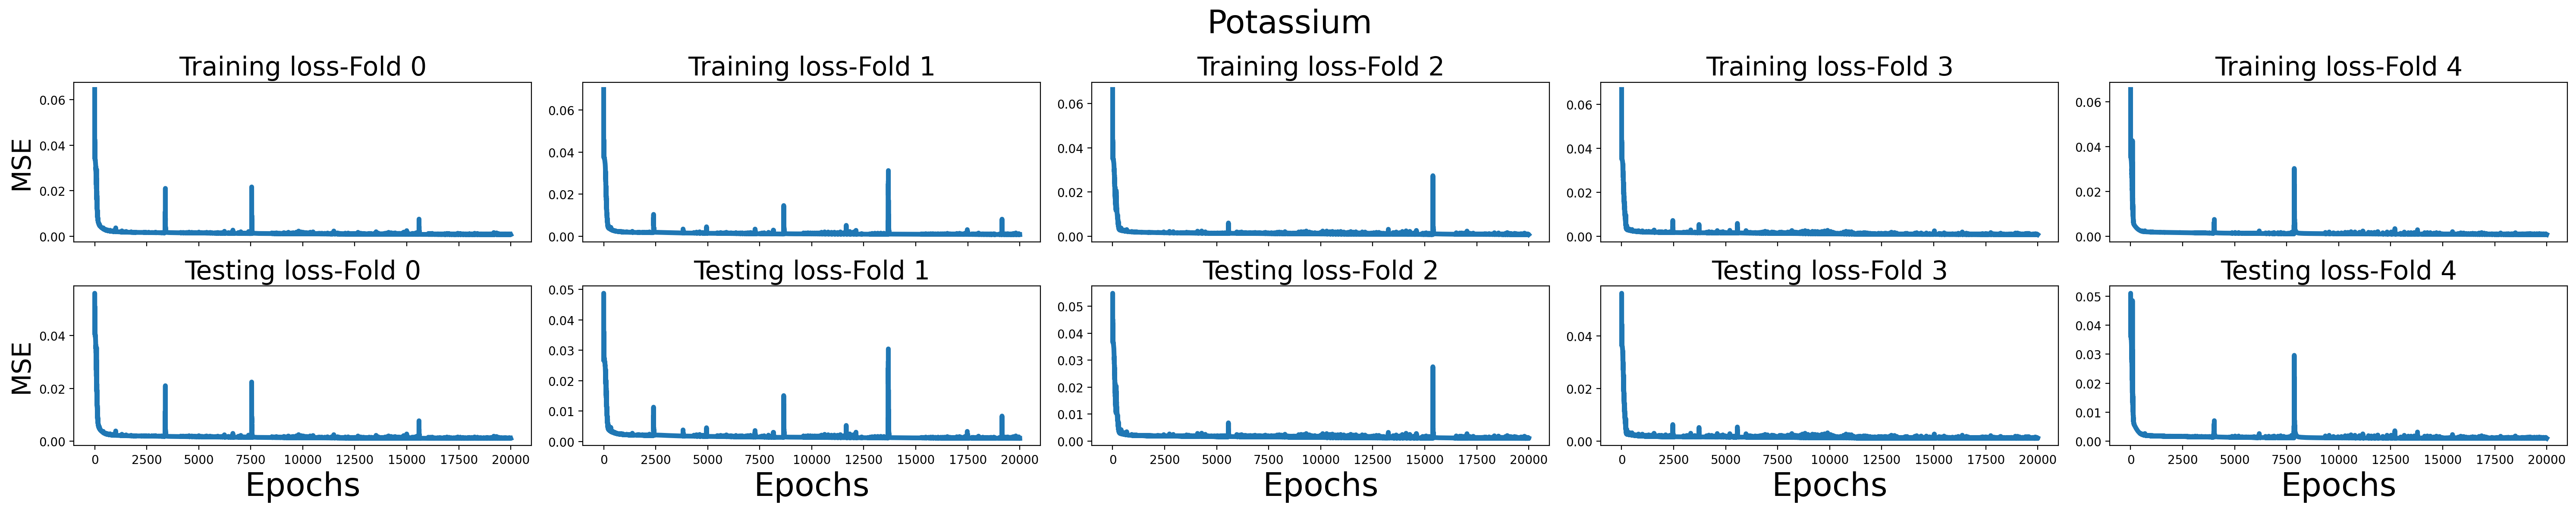

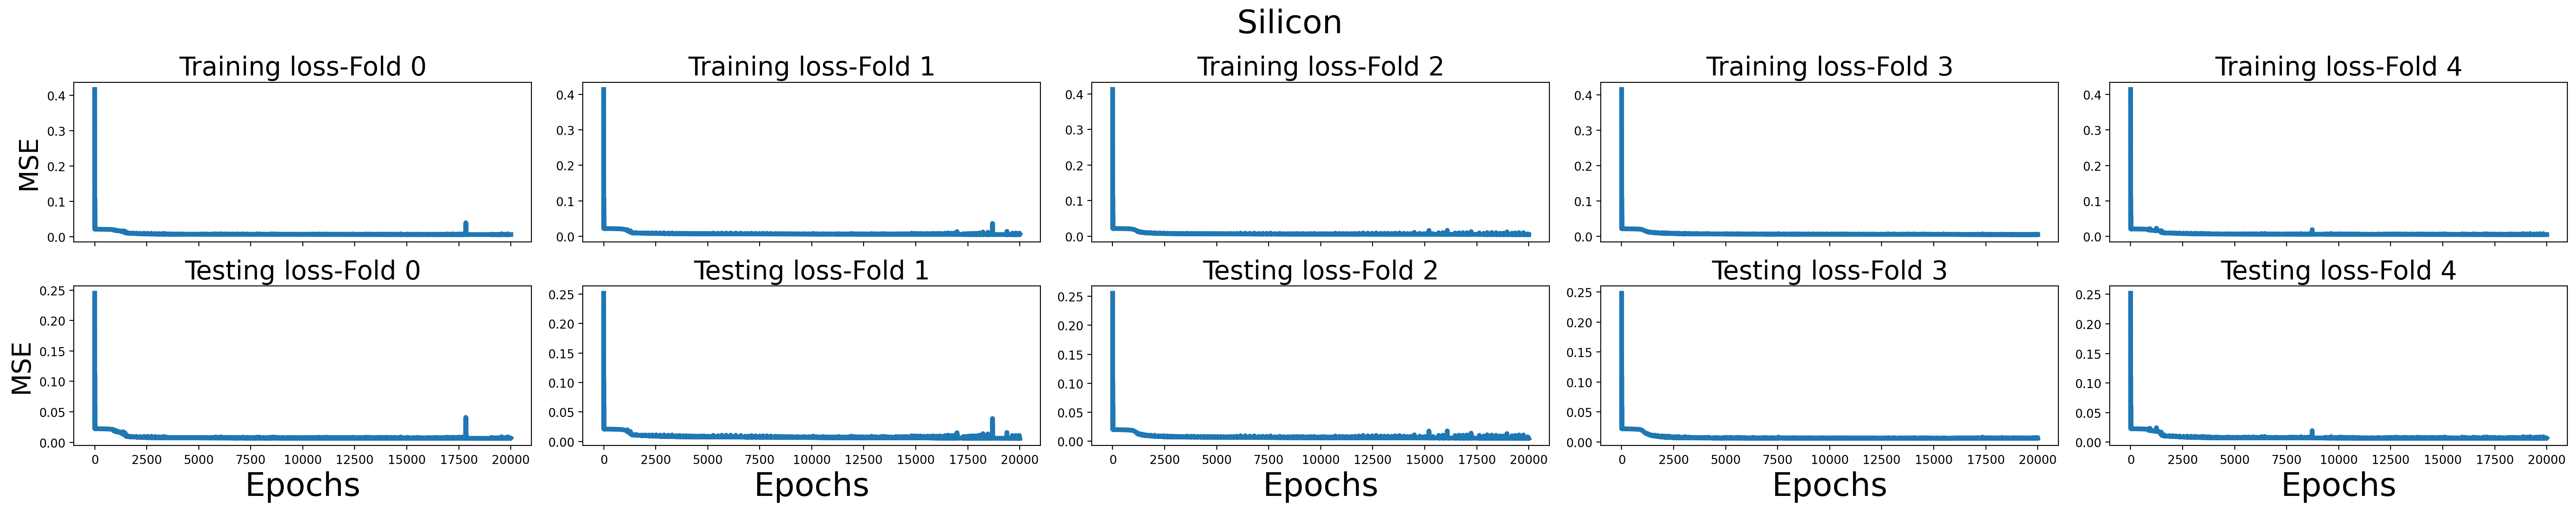

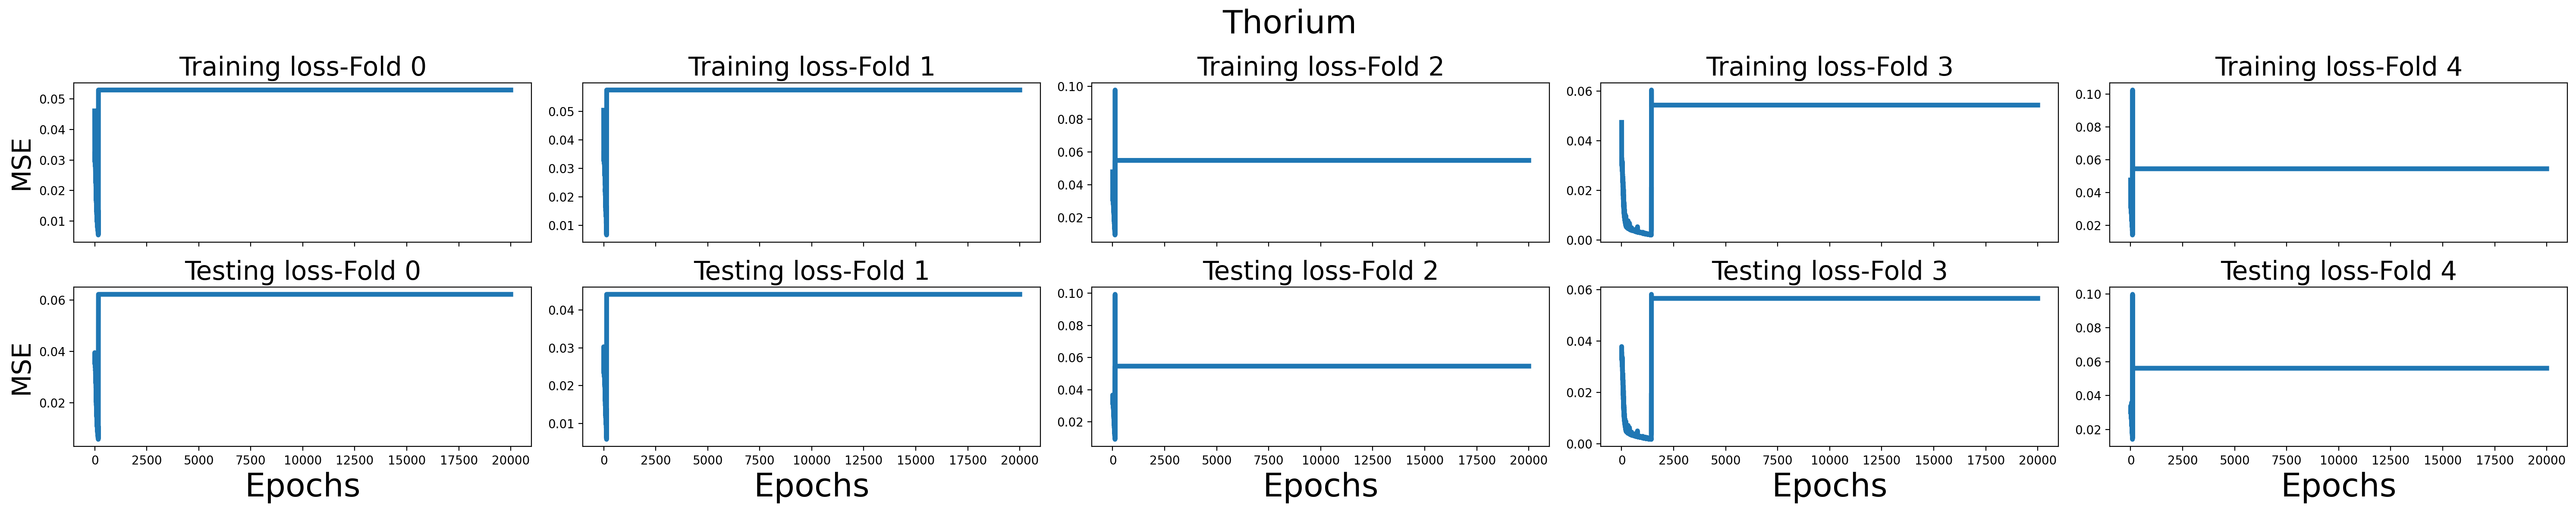

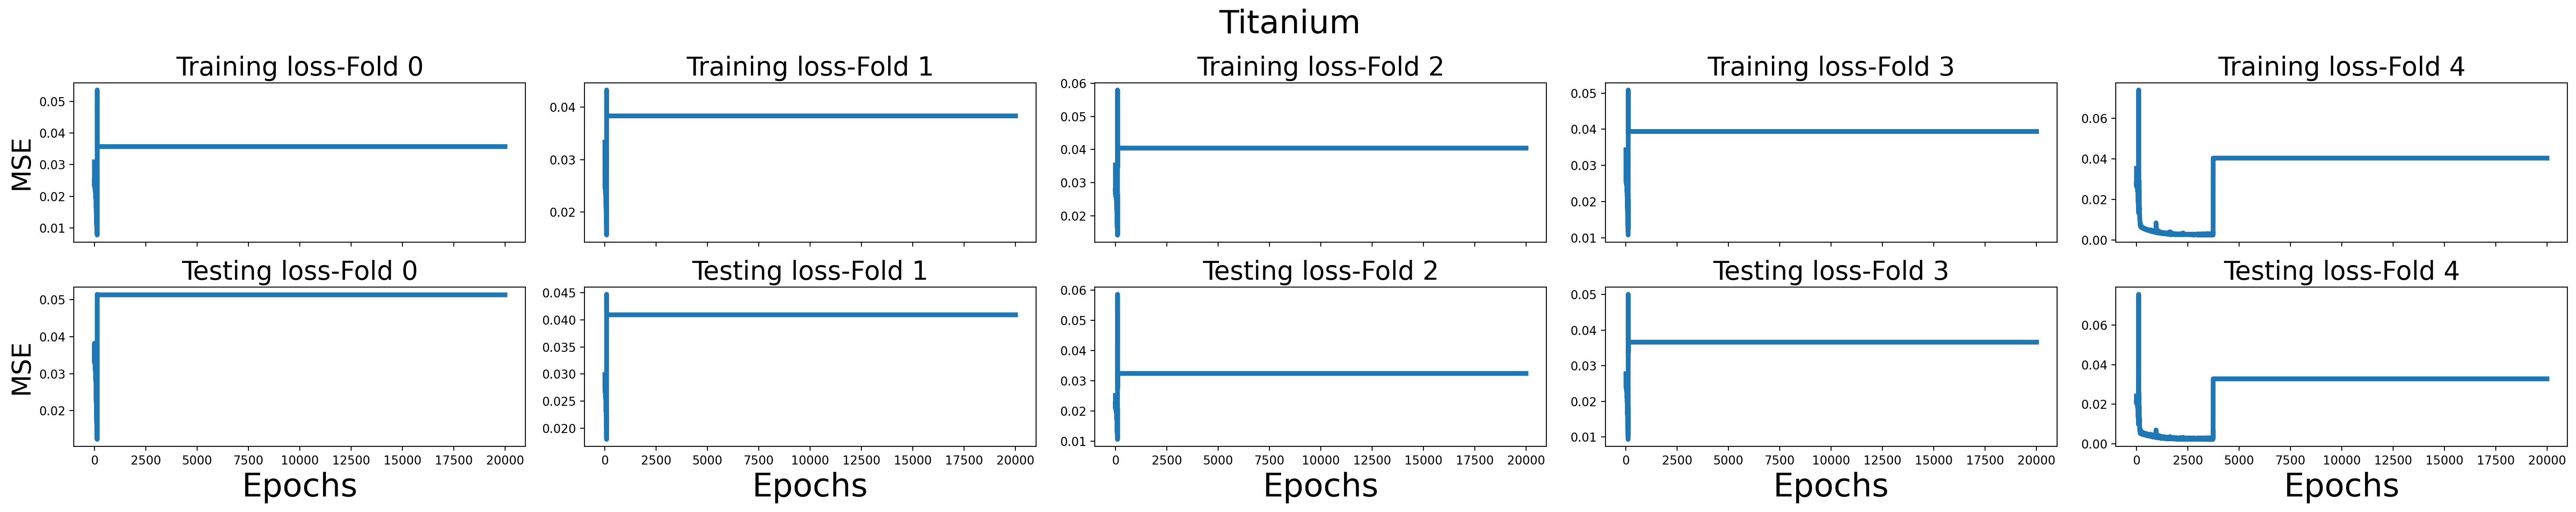

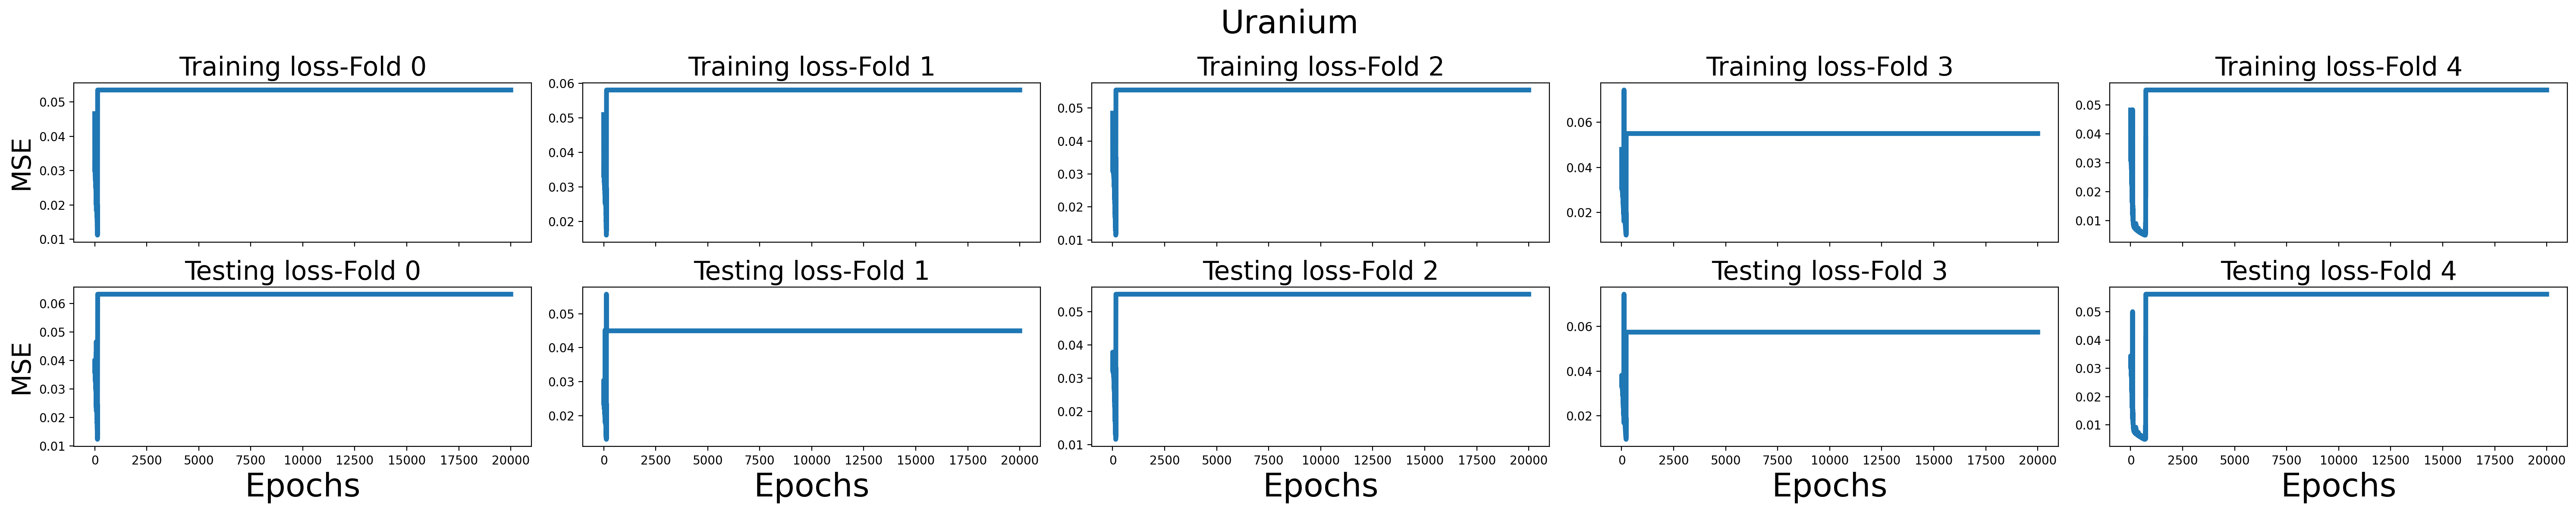

In [108]:
#iterate through all the elements
for currentMineralIndex,currentElementName in zip(range(len(elementNames)),elementNames):
    print(f"{currentMineralIndex+1}---{currentElementName}")
    
    #select the mineral whose abundance is to be estimated
    currentMineralAbundancevalues=abundanceValues[currentMineralIndex]
    #scale the abundance values between 0 and 1
    scaledAbundanceValuesCurrentAbundanceValues=(currentMineralAbundancevalues-np.amin(currentMineralAbundancevalues))/np.ptp(currentMineralAbundancevalues)
    
    #create a figure
    figure,axes=plt.subplots(nrows=noOfFolds//noOfPlotsPerRow*2,
                             ncols=noOfPlotsPerRow,
                             figsize=(30,6),
                             dpi=200,
                             sharex=True)


    #iterate through the folds
    for i,(trainingIndices,testingIndices) in enumerate(splitter.split(scaledAbundanceValuesCurrentAbundanceValues)):
        
        #build the model
        abundanceEstimator=tf.keras.models.load_model(untrainedModelAddress,
                                                      compile=False)
        
        #create lists to hold training and test losses
        trainingLosses=[]
        testingLosses=[]
        #print the number of the fold
        print(f"For {(i+1)}st fold:")
        #get the training and testing spectra
        trainingSpectra=logScaledNormalizedSpectraPerSection[trainingIndices,:]
        testingSpectra=logScaledNormalizedSpectraPerSection[testingIndices,:]

        #get the training and testing abundances
        trainingAbundances=scaledAbundanceValuesCurrentAbundanceValues[trainingIndices]
        testingAbundances=scaledAbundanceValuesCurrentAbundanceValues[testingIndices]

        #train the network for the specified number of epochs
        for currentEpoch in range(noOfEpochs):
            #iterate over all samples
            for j in range(0,trainingIndices.shape[0],batchSize):
                #get the training spectra and abundances in the current batch
                currentBatchSpectra=trainingSpectra[j:j+batchSize,:]
                currentBatchAbundances=trainingAbundances[j:j+batchSize]

                #compute the gradient and use it to update the wieghts
                with tf.GradientTape() as tape:

                    #compute the output of the network
                    predictedAbundances=abundanceEstimator(currentBatchSpectra)

                    #compute the loss
                    loss=lossCalculator(tf.cast(predictedAbundances,
                                                 tf.float32),
                                         tf.cast(currentBatchAbundances,
                                                 tf.float32))

                    #compute the gradient for the total loss
                    gradientValues=tape.gradient(loss,
                                                 abundanceEstimator.trainable_variables)
                    
                    
                #optimize for the loss
                optimizer.apply_gradients(zip(gradientValues,abundanceEstimator.trainable_variables))

            #save the loss for the last batch
            trainingLosses.append(loss)
            
            
            #get the testing spectra and abundances in the current batch
            currentBatchSpectra=testingSpectra[:,:]
            currentBatchAbundances=testingAbundances[:]


            #compute the gradient and use it to update the wieghts
            with tf.GradientTape() as tape:

                #compute the output of the network
                predictedAbundances=abundanceEstimator(currentBatchSpectra)
                #compute the loss
                loss=lossCalculator(tf.cast(currentBatchAbundances,
                                             tf.float32),
                                     tf.cast(predictedAbundances,
                                             tf.float32))
                
            
            #save the loss for the last batch
            testingLosses.append(loss)


            #print testing loss at every 500 epochs
            if (currentEpoch+1)%2000==0 or currentEpoch==0:
                print(f"Epoch {str(currentEpoch+1) if currentEpoch >0 else '0000'}\t--\tTraining Loss {round(trainingLosses[-1].numpy()*1e4,2)}e-4\t--\tTesting Loss {round(testingLosses[-1].numpy()*1e4,2)}e-4")
                
        #plot the training and testing loss curves
        axes[0,i%noOfPlotsPerRow].plot(np.arange(0,len(trainingLosses),1),
                                      trainingLosses,
                                       lw=4)
        axes[1,i%noOfPlotsPerRow].plot(np.arange(0,len(testingLosses),1),
                                      testingLosses,
                                       lw=4)
        #annotate the figure
        axes[0,i%noOfPlotsPerRow].set_title("Training loss-Fold "+str(i),
                                           fontsize=baseFontSize*1.2)
        
        axes[1,i%noOfPlotsPerRow].set_title("Testing loss-Fold "+str(i),
                                           fontsize=baseFontSize*1.2)
        
        
        
        axes[1,i%noOfPlotsPerRow].set_xlabel("Epochs",
                                            fontsize=baseFontSize*1.5)

        axes[0,i%noOfPlotsPerRow].margins(0.05)
        axes[1,i%noOfPlotsPerRow].margins(0.05)
        
        #set the name of the model is to be saved
        trainedModelAddress="E:/Ml4Sci_GRS_abundance_estimation/Models/trained_"+currentElementName+"_estimator_Fold_"+str(currentEpoch)+".h5"
        #save the model to disk
        tf.keras.models.save_model(abundanceEstimator,trainedModelAddress)
        
        #delete the model from memory
        abundanceEstimator=None
        del abundanceEstimator

        
    #add layels to the y axis
    axes[0,0].set_ylabel("MSE",
                         fontsize=baseFontSize*1.2)

    axes[1,0].set_ylabel("MSE",
                         fontsize=baseFontSize*1.2)
        
    #set the title for the figure
    figure.suptitle(currentElementName,fontsize=baseFontSize*1.5)

    #adjust the layout
    plt.tight_layout()
        